In [1]:
require(data.table)
require(dada2)
require(phyloseq)
require(ggplot2)
options(repr.plot.width=20, repr.plot.height=15)

Loading required package: data.table

Loading required package: dada2

Loading required package: Rcpp

Loading required package: phyloseq

Loading required package: ggplot2



In [2]:
meta=fread("~/Documents/DE/DE_16S/DE16S_allmeta.csv")
asv_all=fread("~/Documents/DE/DE_16S/ASVs/Run123_ASV_nochim.csv")
taxa=read.csv("~/Documents/DE/DE_16S/ASVs/Run123_taxa.csv", header=TRUE, row.names=1)

In [3]:
rows=as.vector(asv_all[,1])
asv_all=asv_all[,-1]
asv_all=apply(asv_all, 2, as.numeric)
row.names(asv_all)=rows$V1

In [4]:
#negative controls 
negs=meta[meta$Experiment=="Negative",]
negcounts=asv_all[row.names(asv_all) %in% negs$UniqueID,]
negcounts[,colSums(negcounts)>0]
remove=negcounts[,colSums(negcounts)>0]

TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG
2019____EC_01_BAC  0                                                                                                                                                                                                                                                             
2019____EC_02_BAC  0                                                                                                                                                                                                                                                             
Neg1              20                                                                                                                                                                                                                                                             
Neg2               7                                                                                                                                                                                                                                                             
Neg3              22                                                                                                                                                                                                                                                             
Neg4              17                                                                                                                                                                                                                                                             
                  TACATAGGGTGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTTCGTAGGCGGTTTATTAAGTCTGAAGTTAAAGCTCGGTGCTCAACACCGACCCGCTTTGGATACTGATAGACTAGAGTTATATAGAGGTTAGCGGAACTCCATGTGAAGCGGTGGAATGCGTAGATATATGGAAGAACACCAATGGCGAAGGCAGCTAACTGGATATACACTGACGCTGAGGAACGAAAGCGTGGGGAGCAAACAGG
2019____EC_01_BAC  0                                                                                                                                                                                                                                                          
2019____EC_02_BAC  0                                                                                                                                                                                                                                                          
Neg1               2                                                                                                                                                                                                                                                          
Neg2              12                                                                                                                                                                                                                                                          
Neg3              16                                                                                                                                                                                                                                                          
Neg4               6                                                                                                                                                                                                                                                          
                  TACGTATGTCGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGAGTCTAGGCGGTTTGTTAAGTCAGATGTGAAAATGCGGGGCTCAACTCCGTATGGCCTTTGATACTGGCAAACTAGAGTACTGGAGAGGTGGGCGGAACTACAAGTGTAGAGGTGAAATTCGTAGATATTTGTAGGAATGC

In [5]:
#asv_all=asv_all[,!colnames(asv_all) %in% colnames(remove)]

In [5]:
NCOL(asv_all)

[1] 16383

In [6]:
#pull out the Carryover effect samples
meta_ce=as.data.frame(meta[meta$Experiment=="CE18",])

In [7]:
asv_ce=asv_all[rownames(asv_all) %in% meta_ce$UniqueID,]

In [8]:
asv_ce=asv_ce[,colSums(asv_ce)>0]

In [9]:
head(asv_ce)

TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG
2018__BBO_BBY_B27_CV    0                                                                                                                                                                                                                                                           
2018__BBR_BBB_B50_CV 1088                                                                                                                                                                                                                                                           
2018__BBR_BBG_B38_CV    0                                                                                                                                                                                                                                                           
2018__BBR_BBY_B26_CV    3                                                                                                                                                                                                                                                           
2018__BPR_BPG_O38_CV   13                                                                                                                                                                                                                                                           
2018__BPR_BPR_O02_CV    0                                                                                                                                                                                                                                                           
                     TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG
2018__BBO_BBY_B27_CV 5                                                                                                                                                                                                                                                            
2018__BBR_BBB_B50_CV 0                                                                                                                                                                                                                                                            
2018__BBR_BBG_B38_CV 4                                                                                                                                                                                                                                                            
2018__BBR_BBY_B26_CV 0                                                                                                                                                                                                                                                            
2018__BPR_BPG_O38_CV 0                                                                                                                                                                                                                                                            
2018__BPR_BPR_O02_CV 0                                                                                                                                                                                                                                                            
                     TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCGGTTAAGTAAGTTAATGATAAAAGACCGTGGCTCAACCACGGAAATGTTGTTAATACTGCTTGACTAGAATTTTTGATAGAGG

In [10]:
taxa_ce=taxa[rownames(taxa)%in% colnames(asv_ce),]

In [11]:
taxa_ce=as.matrix(taxa_ce)

In [54]:
meta_ce$First_exposure=paste(meta_ce$Phase_1_DO, meta_ce$Phase_1_temp)

In [55]:
meta_ce$Second_exposure=paste(meta_ce$Phase_2_DO, meta_ce$Phase_2_Temp)

In [56]:
row.names(meta_ce)=meta_ce$UniqueID

In [57]:
OTU = otu_table(t(asv_ce), taxa_are_rows = TRUE)
TAX = tax_table(taxa_ce)
Samp= sample_data(meta_ce)

In [45]:
rownames(meta_ce)

[1] "2018__WBY_BBY_W30_CV" "2018__WBO_BBR_W03_CV" "2018__WBY_BBV_W65_CV"
 [4] "2018__WBG_BBB_W56_CV" "2018__WPV_BPR_G11_CV" "2018__WPO_BPY_G28_CV"
 [7] "2018__WPB_BPG_G45_CV" "2018__WPO_BPO_G16_CV" "2018__BBR_BBB_B50_CV"
[10] "2018__BBR_BBY_B26_CV" "2018__BBR_BBG_B38_CV" "2018__BBO_BBY_B27_CV"
[13] "2018__BPR_BPG_O38_CV" "2018__BPY_BPG_O42_CV" "2018__BPR_BPR_O02_CV"
[16] "2018__BPY_BPY_O29_CV"

In [46]:
sample_names(Samp)

[1] "2018__WBY_BBY_W30_CV" "2018__WBO_BBR_W03_CV" "2018__WBY_BBV_W65_CV"
 [4] "2018__WBG_BBB_W56_CV" "2018__WPV_BPR_G11_CV" "2018__WPO_BPY_G28_CV"
 [7] "2018__WPB_BPG_G45_CV" "2018__WPO_BPO_G16_CV" "2018__BBR_BBB_B50_CV"
[10] "2018__BBR_BBY_B26_CV" "2018__BBR_BBG_B38_CV" "2018__BBO_BBY_B27_CV"
[13] "2018__BPR_BPG_O38_CV" "2018__BPY_BPG_O42_CV" "2018__BPR_BPR_O02_CV"
[16] "2018__BPY_BPY_O29_CV"

In [58]:
OTU=transform_sample_counts(OTU, function(x) 1E6 * x/sum(x))

In [59]:
CE = phyloseq(OTU, TAX, Samp)

In [49]:
taxa_names(CE)

[1] "TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG"                                                                                                                                                                                              
   [2] "TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG"                                                                                                                                                                                                
   [3] "TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCGGTTAAGTAAGTTAATGATAAAAGACCGTGGCTCAACCACGGAAATGTTGTTAATACTGCTTGACTAGAATTTTTGATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAATTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG"                                                                                                                                                                                              
   [4] "TACGGAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCGCGTAGGCGGCTGTCCAAGTCAGGGGTGAAAGCCCGCGGCTCAACCGCGGAACTGCCCTTGAAACTGGACGGCTTGAACACGGGAGAGGTGAGTGGAATTCCGAGTGTAGAGGTGAAATTCGTAGATATTCGGAAGAACACCAGTGGCGAAGGCGACTCACTGGACCGTAGTTGACGCTGAGGCGCGAAAGCGTGGGGAGCGAACAGG"                                                                                                                                                                                                
   [5] "TTCCAGCTCCAATAGCGTATATTAAAGTTGCTGCAGTTAAAAAGCTCGTAGCTGGATCTCGGGTCCAGGCTGGCGGTCCACCTCGTTGTGGTTACTGCCTGTTCTGACCCAACCTCTCGGTTGTAAACCCTTGGTGCTCTTGATTGAGTTGCTTCGGGTGGCCGAAACTTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCGATTCGCCTGCACAATGGTGCATGGAATAATGGAATAGGACCTCGGTTCTATTTTGTTGGTTTTCGGAACACGAGGTAATGATTAAGAGGGACTGACGGGGGCATTCGTATGGCGGGGTTAGAGGTGAAATTCTTGGATCCTCGCCAGACGGCCTACAGCGAAAGCATTTGCCAAGCATGTTTTCATTAGTCAAGAACGAAAGTCAGAGGTTCGAAGACG"                     
   [6] "GACGGAGGATGCAAGTGTTATCCGGAATCACTGGGCGTAAAGCGTCTGTAGGTGGTTTAATAAGTCAACTGTTAAATCTTGAGGCTCAACTTCAAAATCGCAGTCGAAACTATTAGACTAGAGTATAGTAGAGGTAAAGGGAATTTCCAGTGGAGCGGTGAAATGCGTAGATATTGGAAAGAACACCGATGGCGAAAGCACTTTACTGGGCTATTACTAACACTCAGAGACGAAAGCTAGGGTAGCAAATGGG"                                                                                                                                                                                                
   [7] "TACGGAGGGTGCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTACGTAGGTGGTTTGGTAAGTCAGAGGTGAAATACGGTAGCTTAACTATCGAATTGCCTTTGATACTATTAAACTTGAGTTCTATTGAGGTAGACGGAATTGATAGTGTAGCGGTGAAATGCATAGATACTATCAGGAACACCAATTGCGAAGGCAGTTTACTAAATAGACACTGACACTAAAGTACGAAGGCGTGGGTAGCAAACAGG"                                                                                                                                                                                                
   [8] "TACGGAGGATGCAAGTGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGTGGTCTGGTAAGTCAGAGGTGAAAGACGGTGGCTCAACCATCGCAGTGCCCTTGATACTATTGGACTAGATTACATTGGAAGTAGGCGGAATGTGCGGTGTAGCGGTGAAATGCGCAGATATCGCACGGAACACCAATAGCGAAAGCAGCTTACTATACTGTTAATGACACTGAGGCACGAAAGCGTGGGTAGCAAATAGG"                                                                                                                                                                                                
   [9] "TACGGGAGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTCCGCAGGCGGTCTTGTAAGTCTGTTGTTAAAGCGTGGAGCTTAACTCCATTTCAGCAATGGAAACTGTAAGACTAGAGTGTGGTAGGGGCAGAGGGAATTCCCGGTGTAGCGGTGAAATGCGTAGATATCGGGAAGAACACCAGTGGCGAAGGCGCTCTGCTGGGCCATAACTGACGCTCATGGACGAAAGCCAGGGGAGCGAAAGGG"                                                                                                     

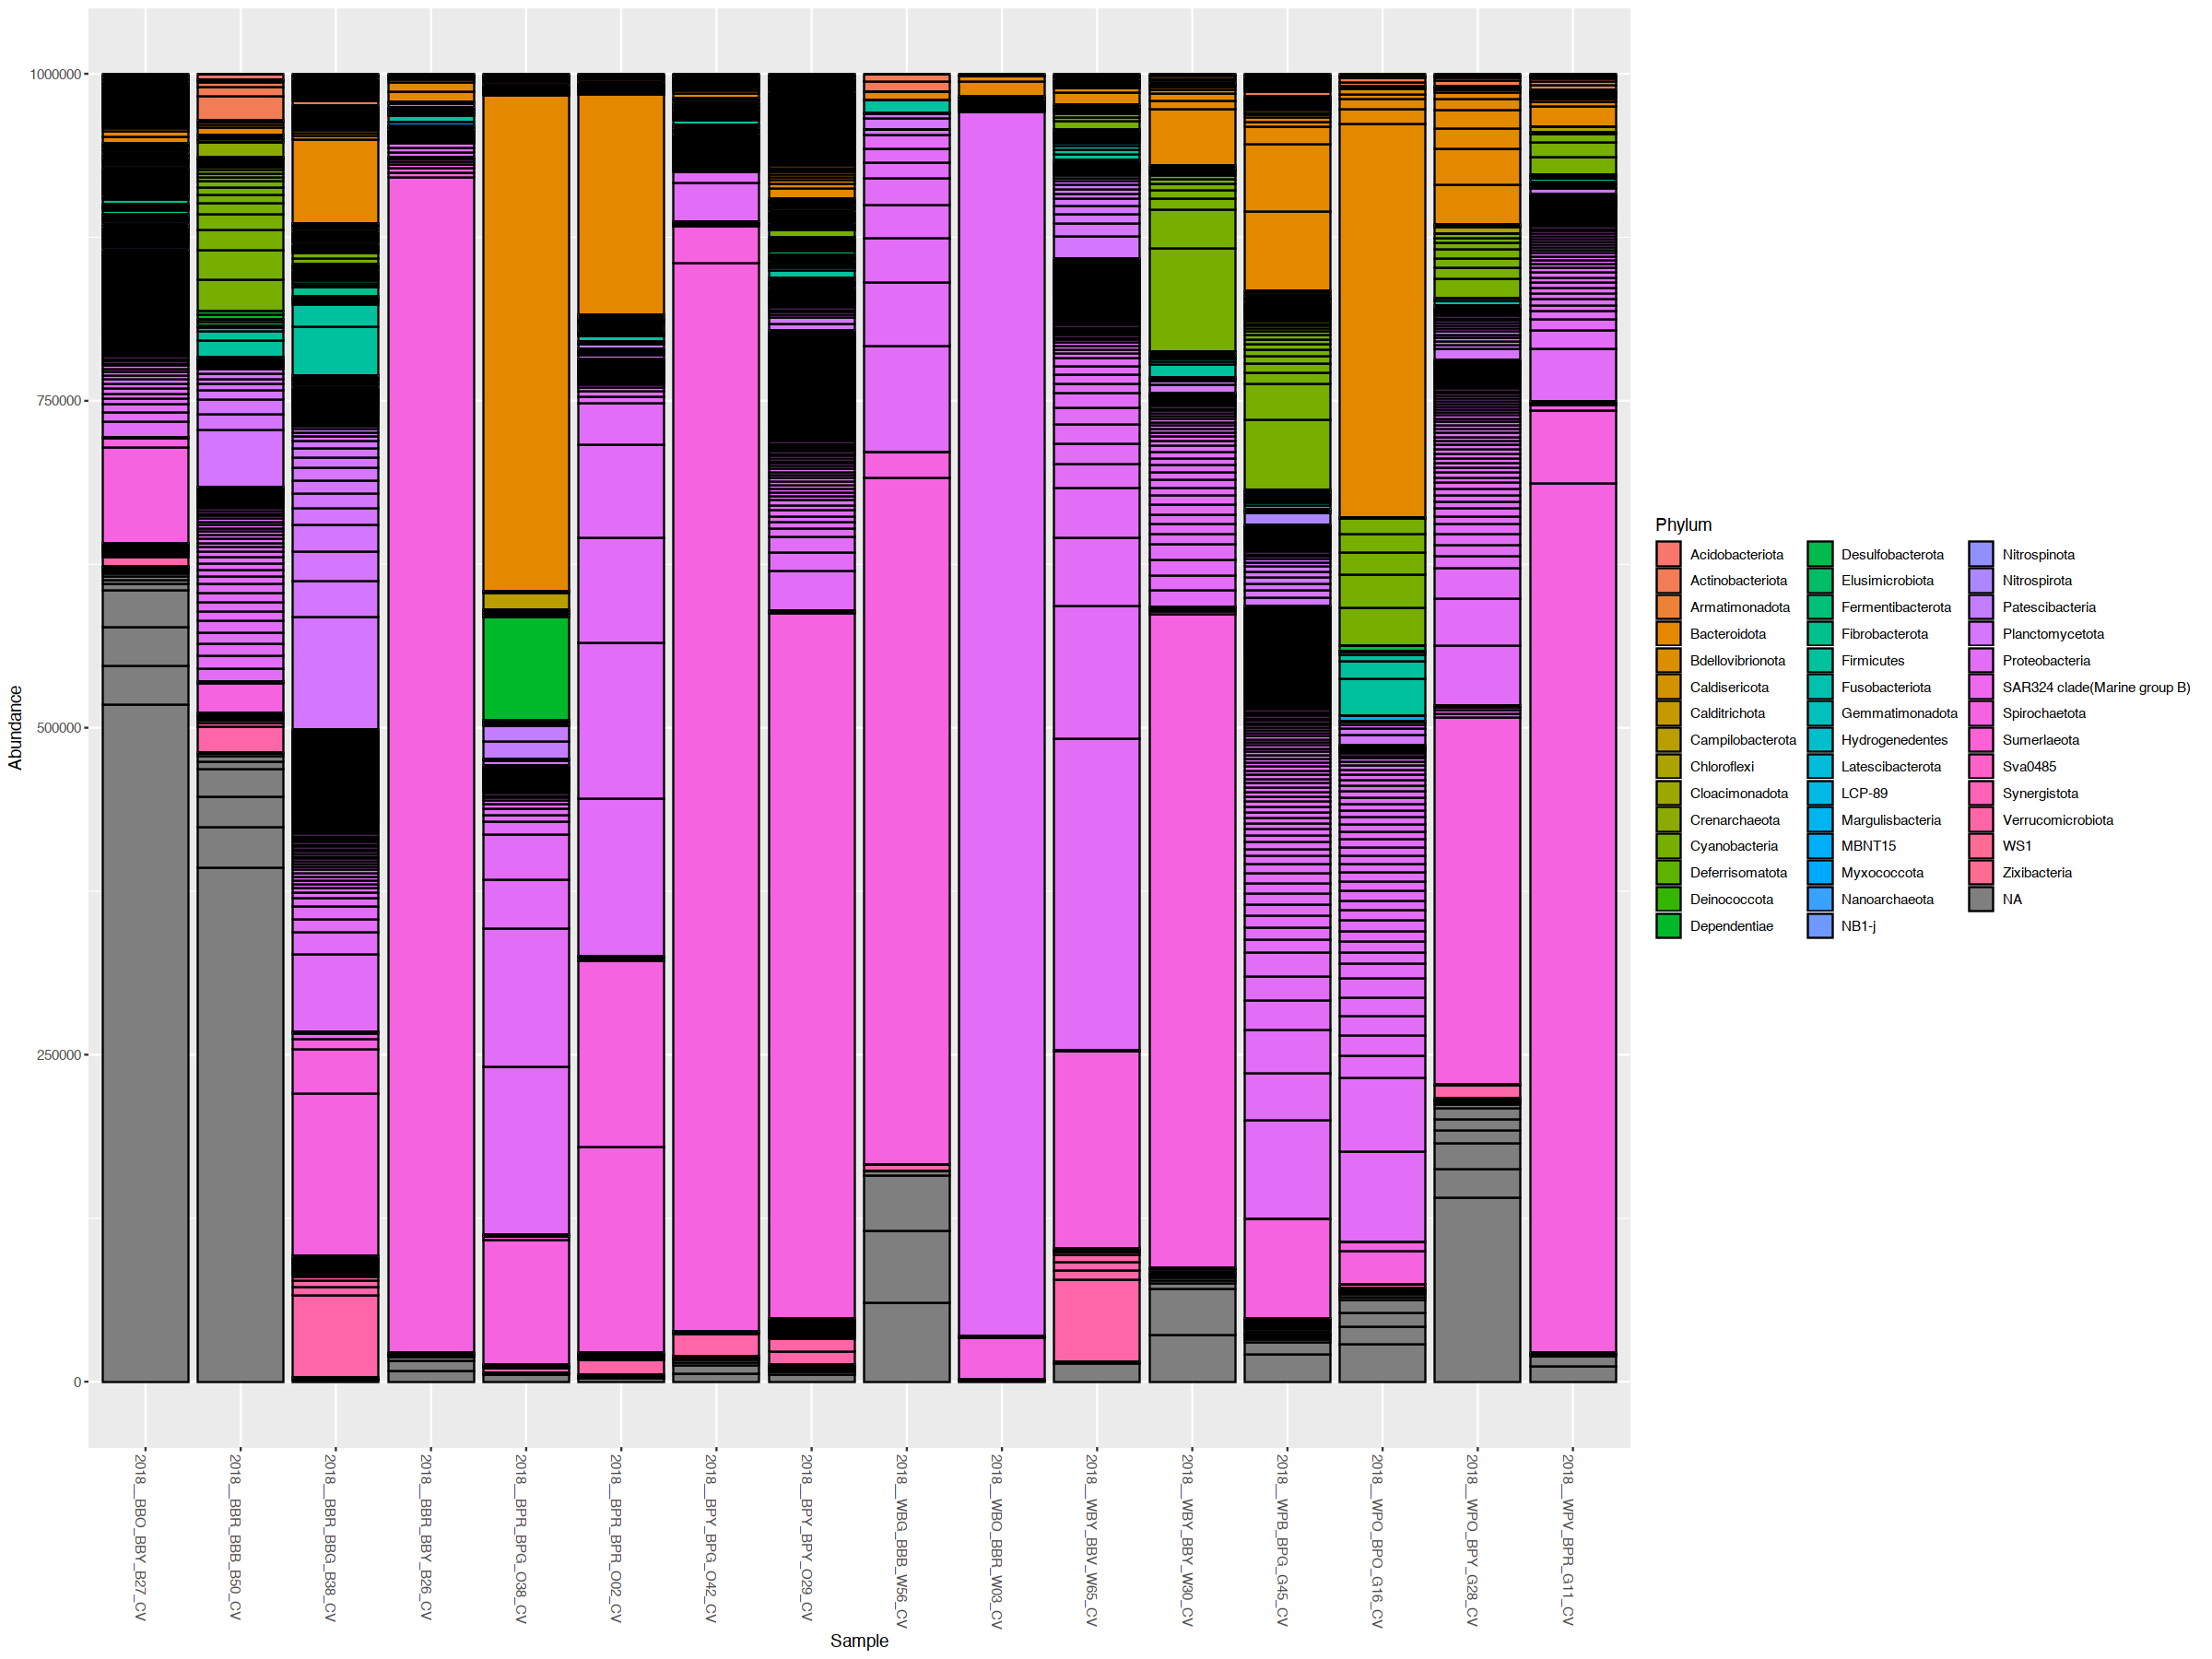

In [22]:
plot_bar(CE, fill = "Phylum")

In [60]:
CE.ord <- ordinate(CE, "NMDS", "bray")

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1115951 
Run 1 stress 0.1303765 
Run 2 stress 0.1303765 
Run 3 stress 0.1303765 
Run 4 stress 0.1232641 
Run 5 stress 0.1166476 
Run 6 stress 0.1322933 
Run 7 stress 0.1145015 
Run 8 stress 0.1268636 
Run 9 stress 0.1031912 
... New best solution
... Procrustes: rmse 0.1046961  max resid 0.3200424 
Run 10 stress 0.1135367 
Run 11 stress 0.1224897 
Run 12 stress 0.1013789 
... New best solution
... Procrustes: rmse 0.03885775  max resid 0.1271599 
Run 13 stress 0.1013789 
... New best solution
... Procrustes: rmse 8.495296e-07  max resid 1.577155e-06 
... Similar to previous best
Run 14 stress 0.1115951 
Run 15 stress 0.1115951 
Run 16 stress 0.1013789 
... Procrustes: rmse 2.246718e-06  max resid 6.490931e-06 
... Similar to previous best
Run 17 stress 0.1308501 
Run 18 stress 0.1131186 
Run 19 stress 0.1235409 
Run 20 stress 0.1013789 
... Procrustes: rmse 6.06239e-06  max resid 1.882665e-05 
... Similar to pre

Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”


In [61]:
(CE)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2968 taxa and 16 samples ]
sample_data() Sample Data:       [ 16 samples by 21 sample variables ]
tax_table()   Taxonomy Table:    [ 2968 taxa by 6 taxonomic ranks ]

In [63]:
head(meta_ce)

V1  UniqueID             Experiment Year Site
2018__WBY_BBY_W30_CV 218 2018__WBY_BBY_W30_CV CE18       2018     
2018__WBO_BBR_W03_CV 219 2018__WBO_BBR_W03_CV CE18       2018     
2018__WBY_BBV_W65_CV 220 2018__WBY_BBV_W65_CV CE18       2018     
2018__WBG_BBB_W56_CV 221 2018__WBG_BBB_W56_CV CE18       2018     
2018__WPV_BPR_G11_CV 222 2018__WPV_BPR_G11_CV CE18       2018     
2018__WPO_BPY_G28_CV 223 2018__WPO_BPY_G28_CV CE18       2018     
                     Treatment1_Density Treatment2_Diversity Color_Bucket
2018__WBY_BBY_W30_CV WBY                BBY                              
2018__WBO_BBR_W03_CV WBO                BBR                              
2018__WBY_BBV_W65_CV WBY                BBV                              
2018__WBG_BBB_W56_CV WBG                BBB                              
2018__WPV_BPR_G11_CV WPV                BPR                              
2018__WPO_BPY_G28_CV WPO                BPY                              
                     Number Species ⋯ peacrabs Phase_1_DO Phase_1_temp
2018__WBY_BBY_W30_CV 30W    CV      ⋯ NA       Normoxic   Ambient     
2018__WBO_BBR_W03_CV 03W    CV      ⋯ NA       Normoxic   Ambient     
2018__WBY_BBV_W65_CV 65W    CV      ⋯ NA       Normoxic   Ambient     
2018__WBG_BBB_W56_CV 56W    CV      ⋯ NA       Normoxic   Ambient     
2018__WPV_BPR_G11_CV 11G    CV      ⋯ NA       Normoxic   Warm        
2018__WPO_BPY_G28_CV 28G    CV      ⋯ NA       Normoxic   Warm        
                     Phase_2_DO Phase_2_Temp Overall_treatment Phase1_total    
2018__WBY_BBY_W30_CV Hypoxic    Ambient      WBBB              Normoxic Ambient
2018__WBO_BBR_W03_CV Hypoxic    Ambient      WBBB              Normoxic Ambient
2018__WBY_BBV_W65_CV Hypoxic    Ambient      WBBB              Normoxic Ambient
2018__WBG_BBB_W56_CV Hypoxic    Ambient      WBBB              Normoxic Ambient
2018__WPV_BPR_G11_CV Hypoxic    Warm         WPBP              Normoxic Warm   
2018__WPO_BPY_G28_CV Hypoxic    Warm         WPBP              Normoxic Warm   
                     Phase2_total First_exposure   Second_exposure
2018__WBY_BBY_W30_CV Hypoxic      Normoxic Ambient Hypoxic Ambient
2018__WBO_BBR_W03_CV Hypoxic      Normoxic Ambient Hypoxic Ambient
2018__WBY_BBV_W65_CV Hypoxic      Normoxic Ambient Hypoxic Ambient
2018__WBG_BBB_W56_CV Hypoxic      Normoxic Ambient Hypoxic Ambient
2018__WPV_BPR_G11_CV Hypoxic      Normoxic Warm    Hypoxic Warm   
2018__WPO_BPY_G28_CV Hypoxic      Normoxic Warm    Hypoxic Warm

In [24]:
unique(meta_ce$Overall_treatment)

[1] "WBBB" "WPBP" "BBBB" "BPBP"

In [25]:
WBBB=normoxic ambient, hypoxic ambient, 
WPBP=normoxic warm, hypoxic warm
BBBB=hypoxic ambient, hypoxic ambient, 
BPBP=hypoxic warm, hypoxic warm 

 

ERROR: Error in parse(text = x, srcfile = src): <text>:1:15: unexpected symbol
1: WBBB=normoxic ambient
                  ^


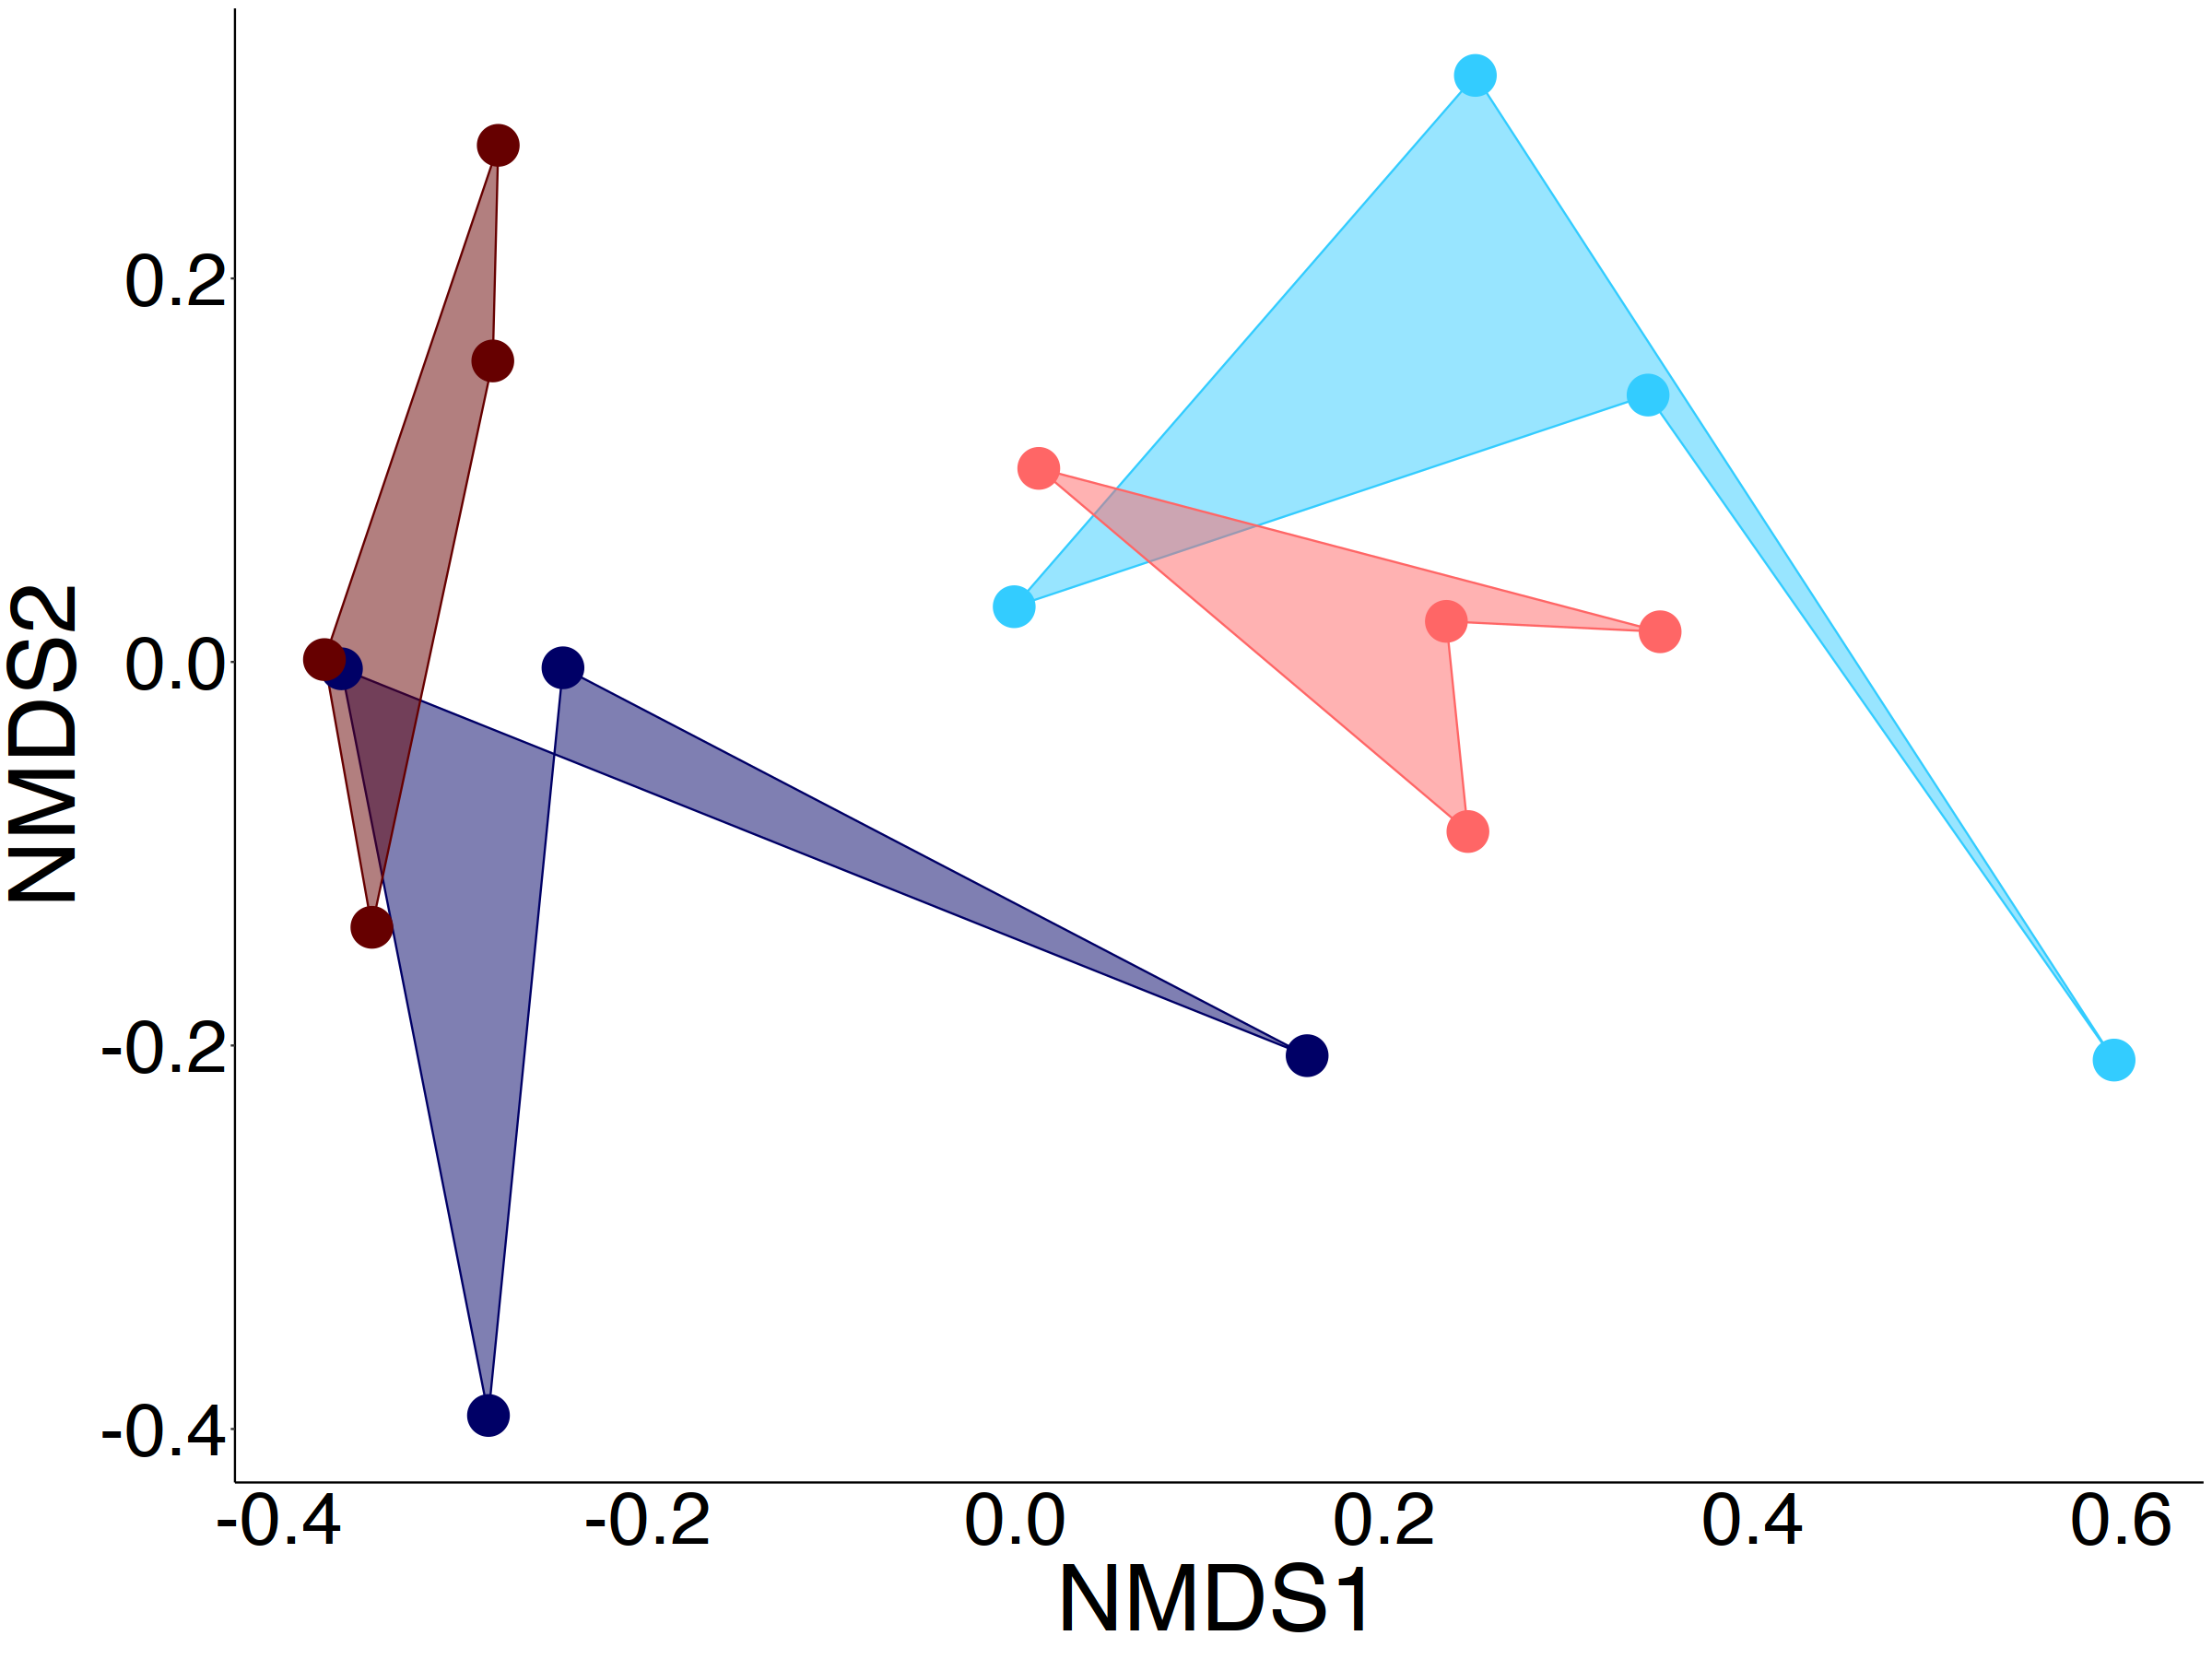

In [81]:
plot_ordination(CE, CE.ord, type="samples", color="First_exposure")+ 
geom_polygon(aes(fill=First_exposure), alpha=0.5)+ 
geom_point(size=12)+
theme_bw()+
scale_color_manual(values=c("#000066", "#660000", "#33CCFF","#FF6666" ))+
scale_fill_manual(values=c("#000066", "#660000", "#33CCFF","#FF6666"))+

 theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=60))

In [ ]:
WB=light blue
WP= light red
BB= dark blue
BP=dark red

In [31]:
ggsave(width=10, height=8, file="~/Documents/DE/DE_16S/CEnMDS.pdf")

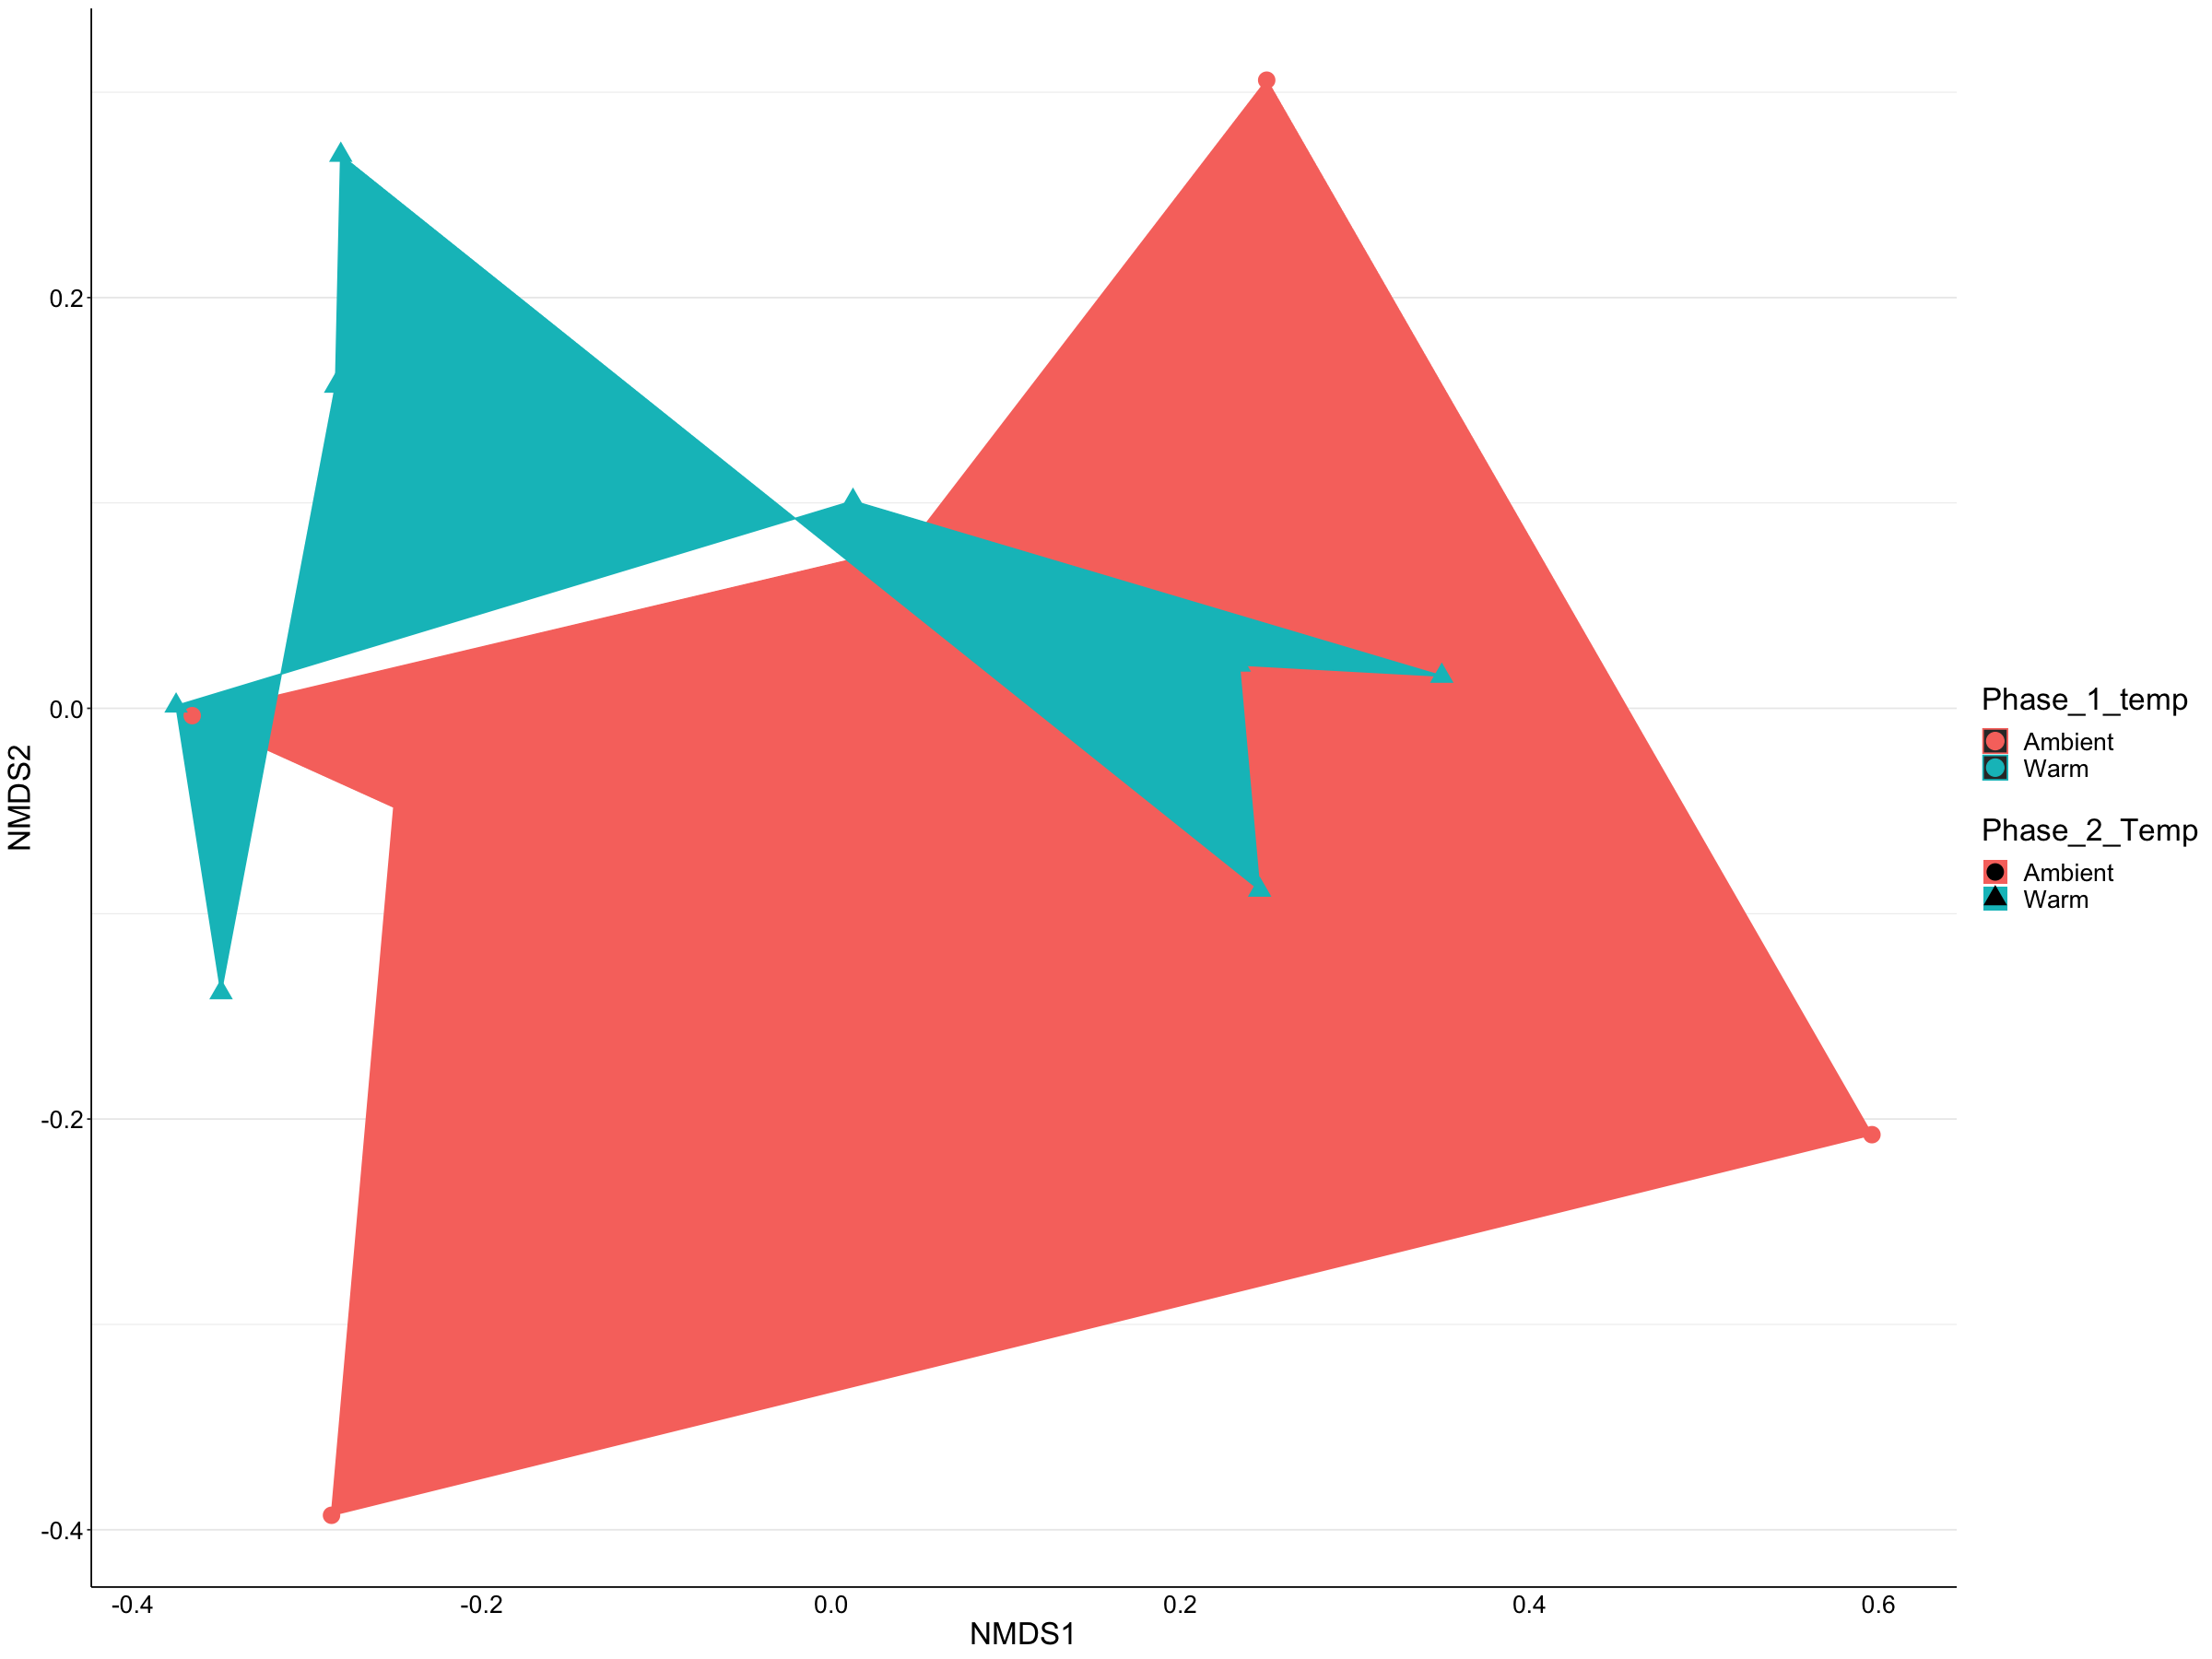

In [32]:
plot_ordination(CE, CE.ord, type="samples", color="Phase_1_temp", shape="Phase_2_Temp")+ 
geom_polygon(aes(fill=Phase_2_Temp))+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

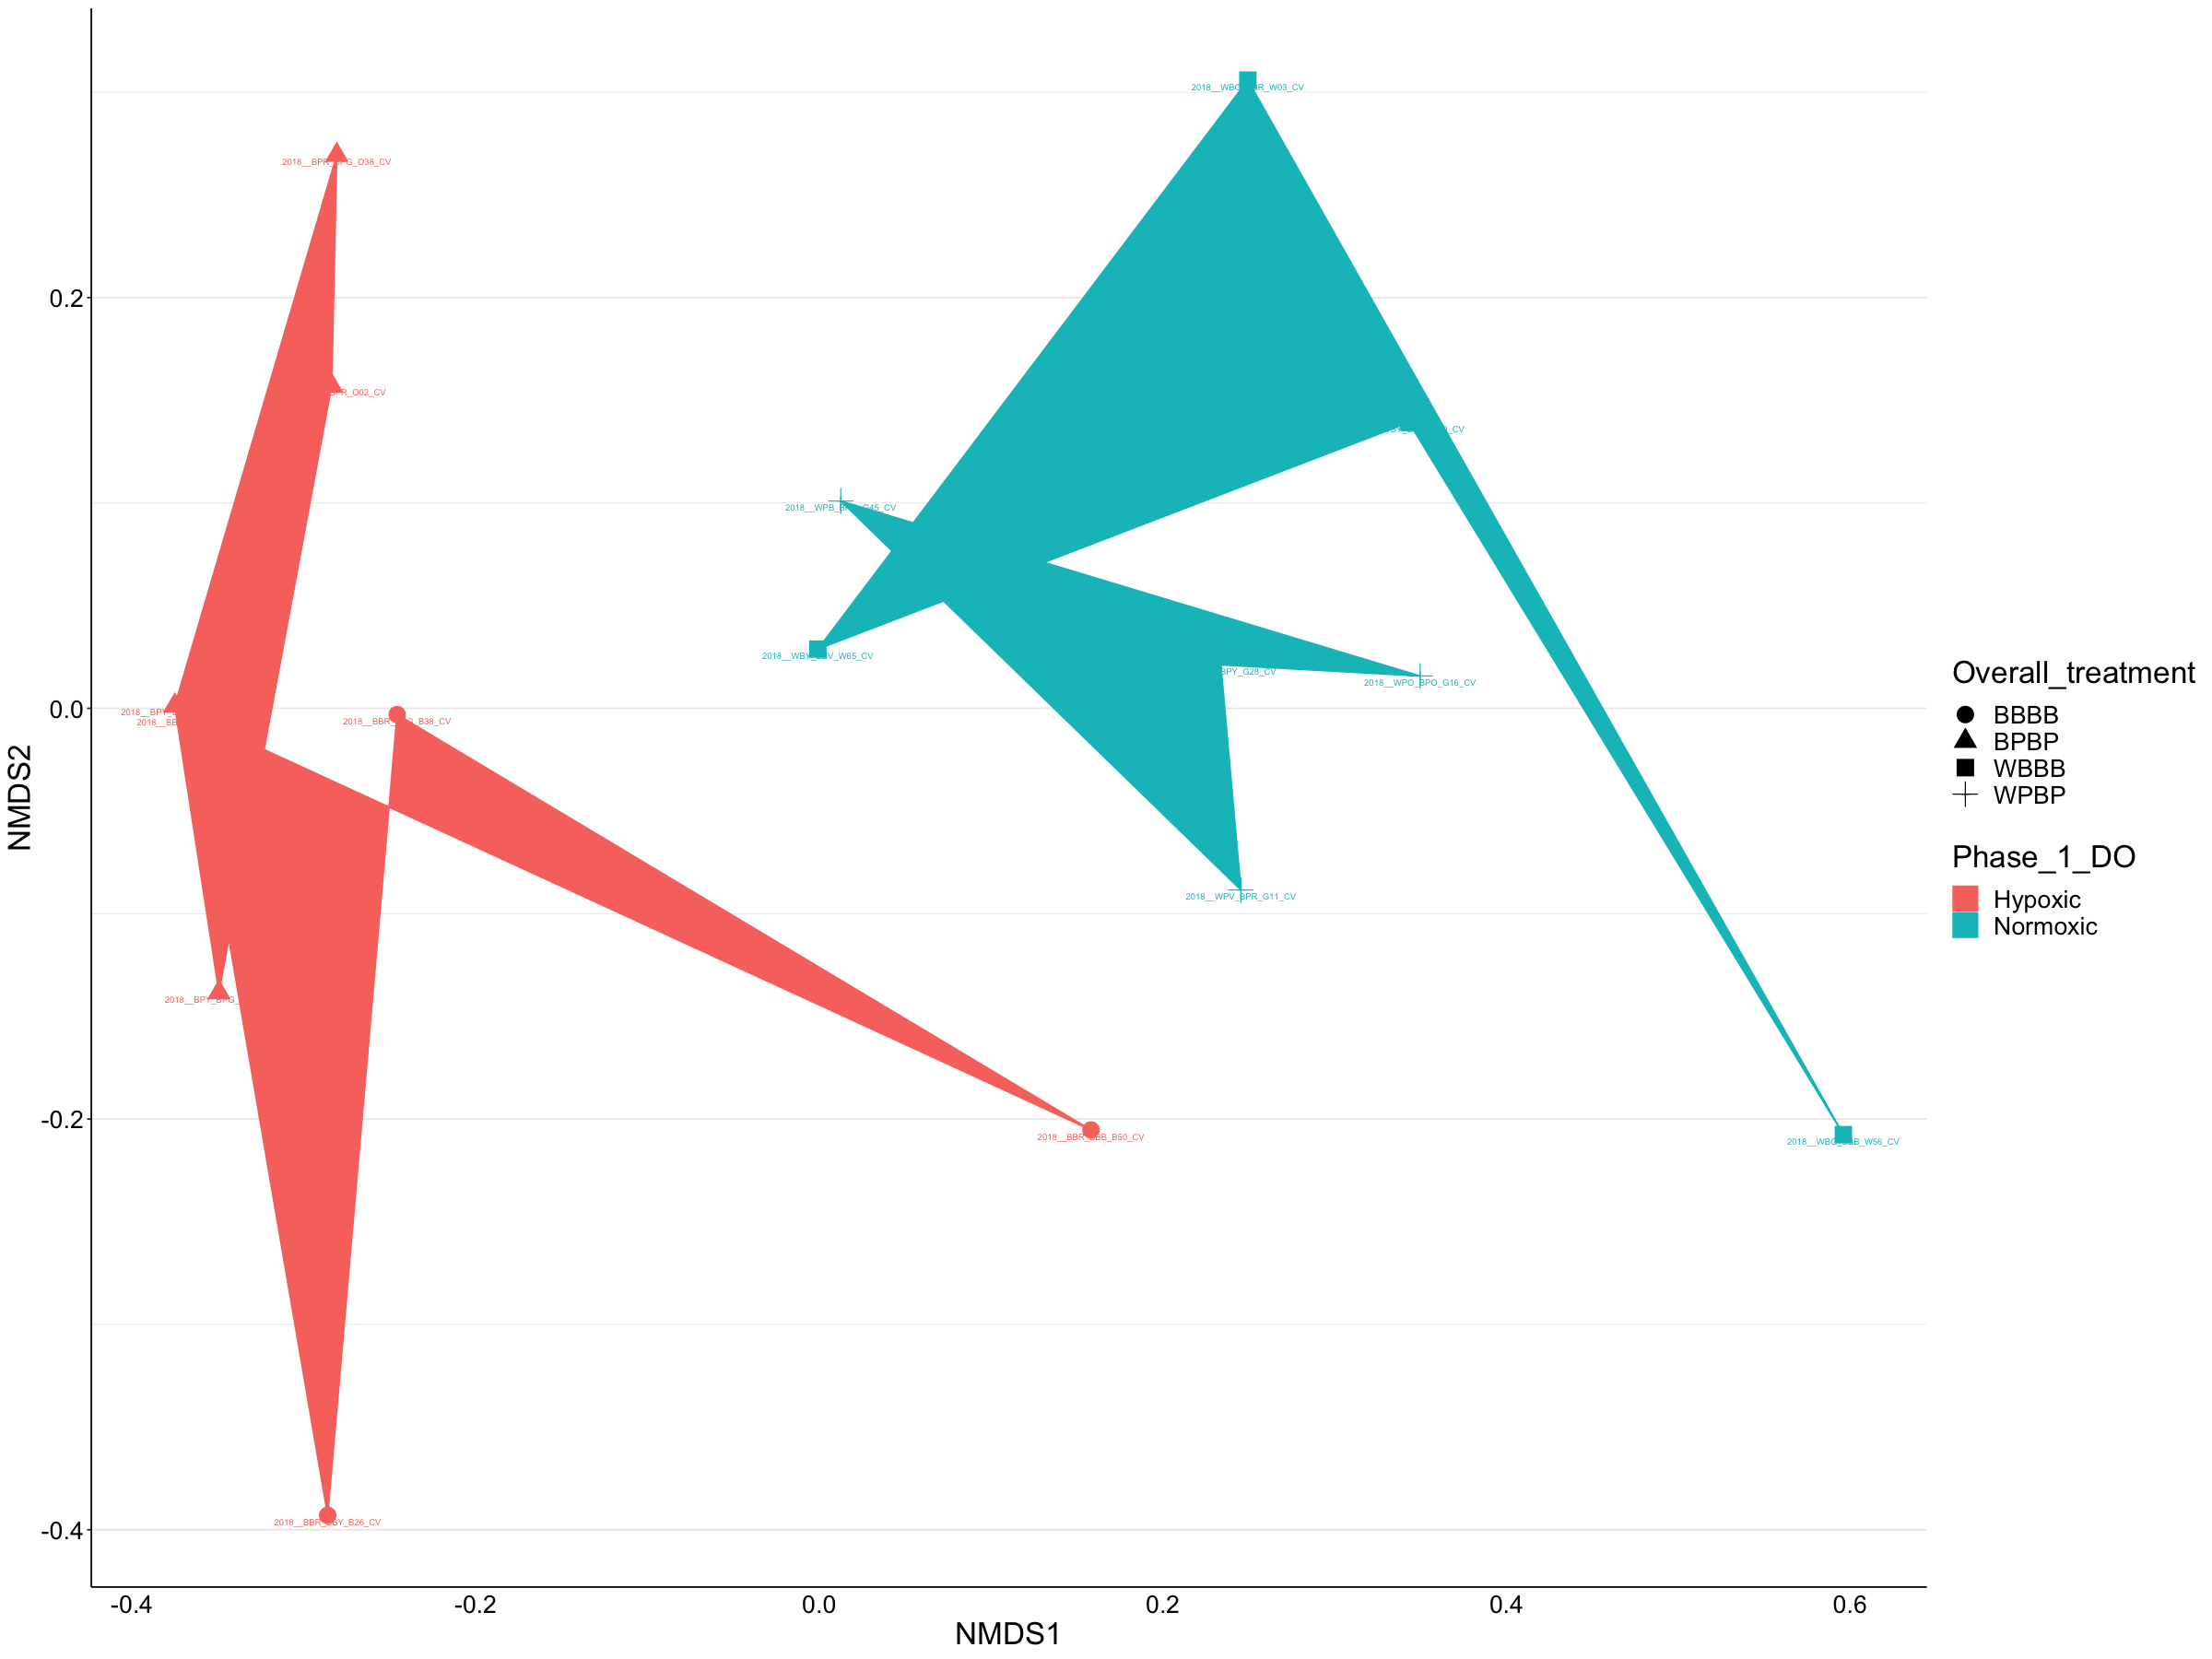

In [33]:
plot_ordination(CE, CE.ord, type="Samples", color="Phase_1_DO", shape="Overall_treatment", label="UniqueID")+ 
geom_polygon(aes(fill=Phase_1_DO))+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

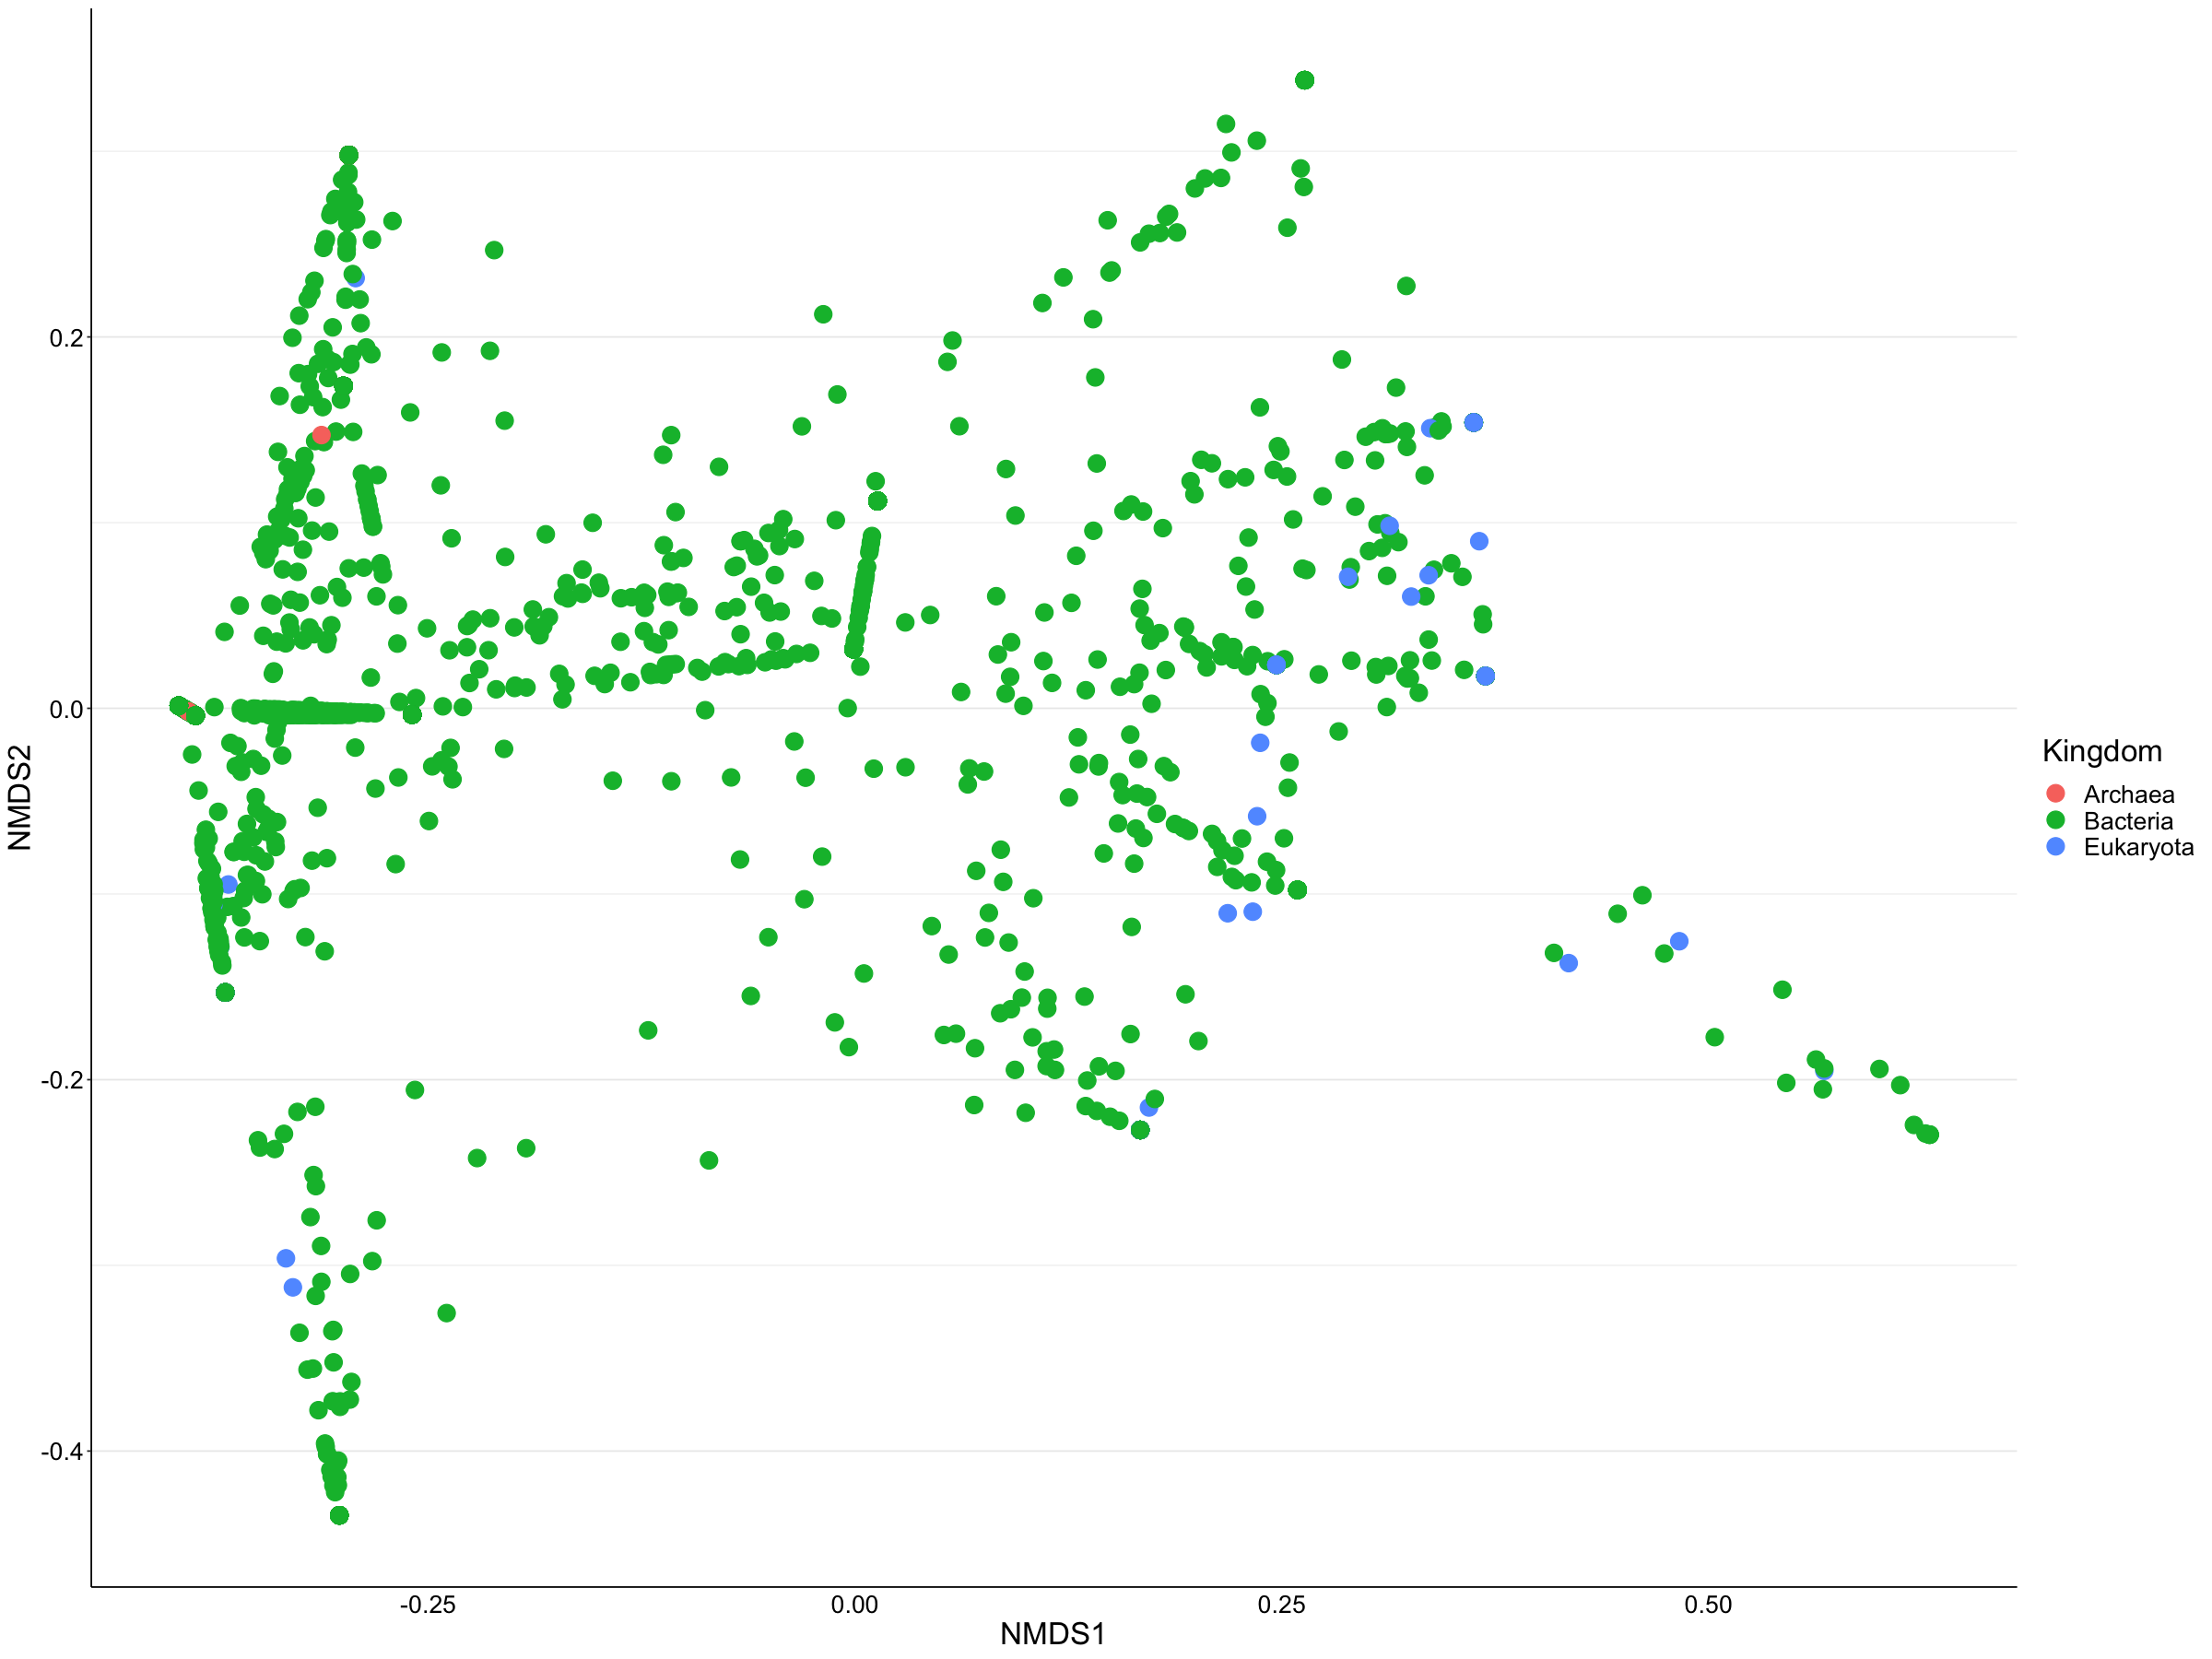

In [34]:
plot_ordination(CE, CE.ord, type="Taxa", color="Kingdom")+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

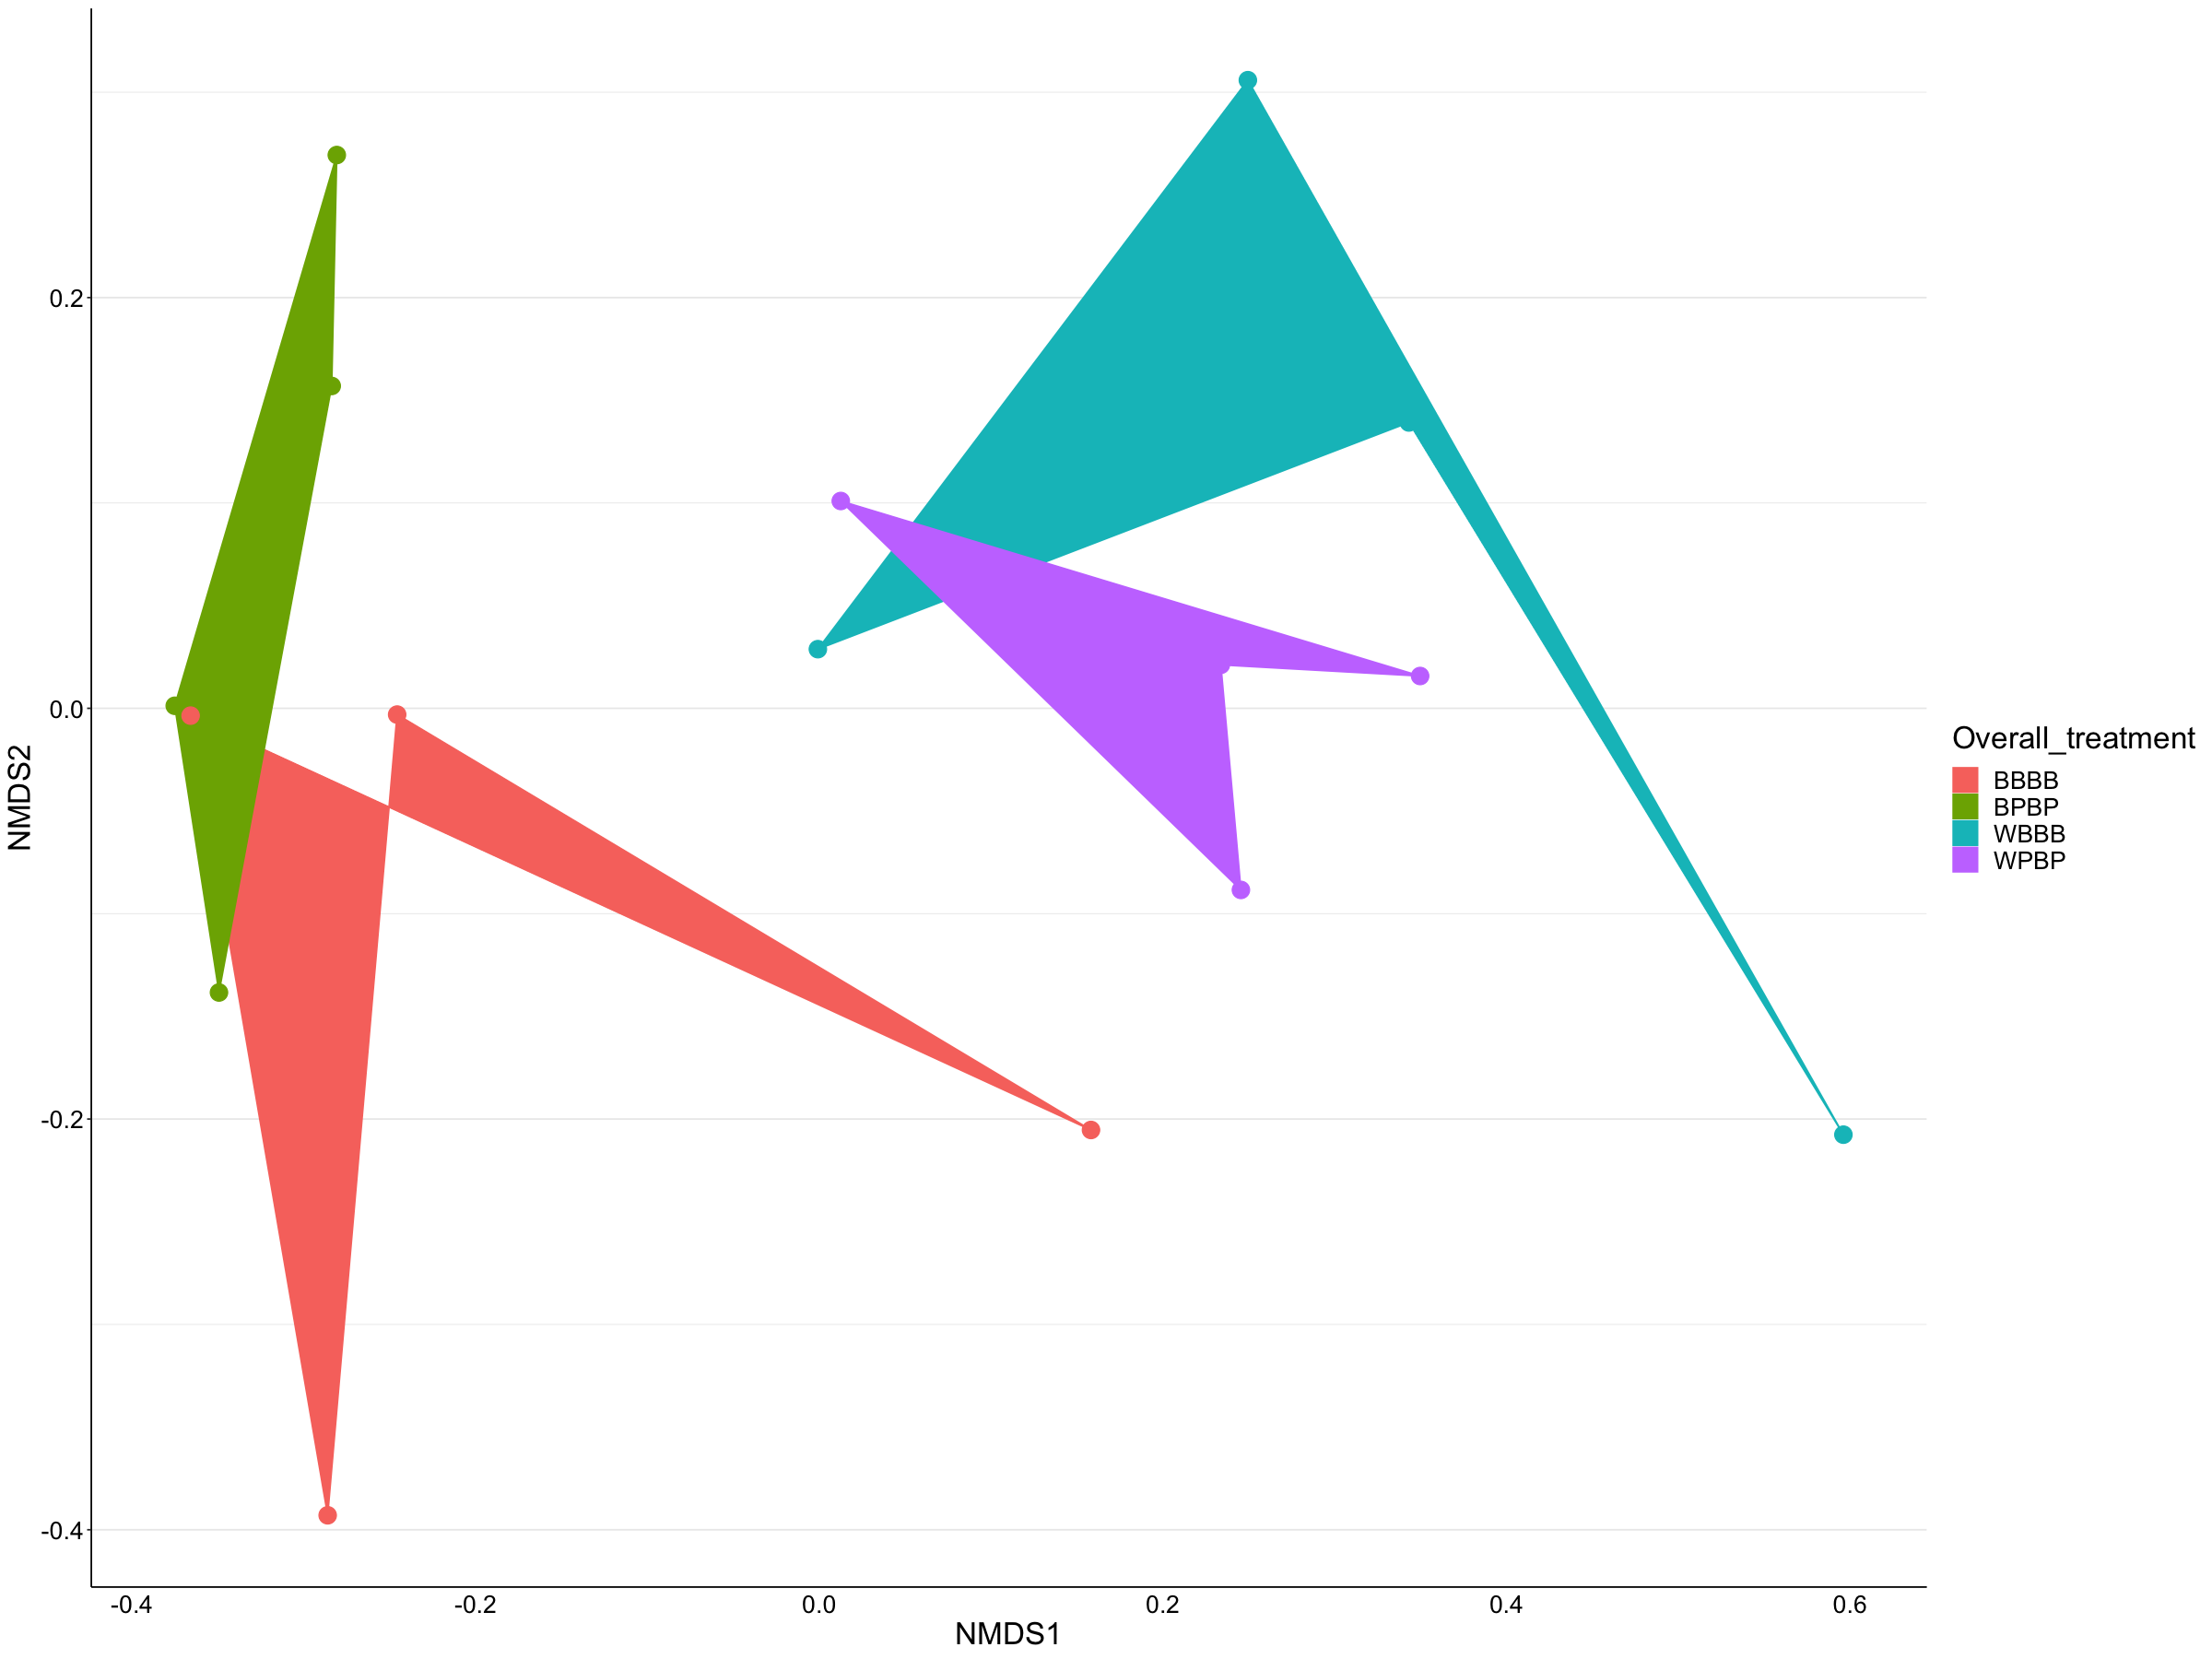

In [35]:
plot_ordination(CE, CE.ord, type="samples", color="Overall_treatment")+ 
geom_polygon(aes(fill=Overall_treatment))+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

BPBP=hypoxic warm, hypoxic warm
BBBB=hypoxic ambient, hypoxic ambient

WBBB=normoxic ambient, hypoxic ambient
WPBP=normoxic warm, hypoxic warm


Warning message:
“Transformation introduced infinite values in discrete y-axis”


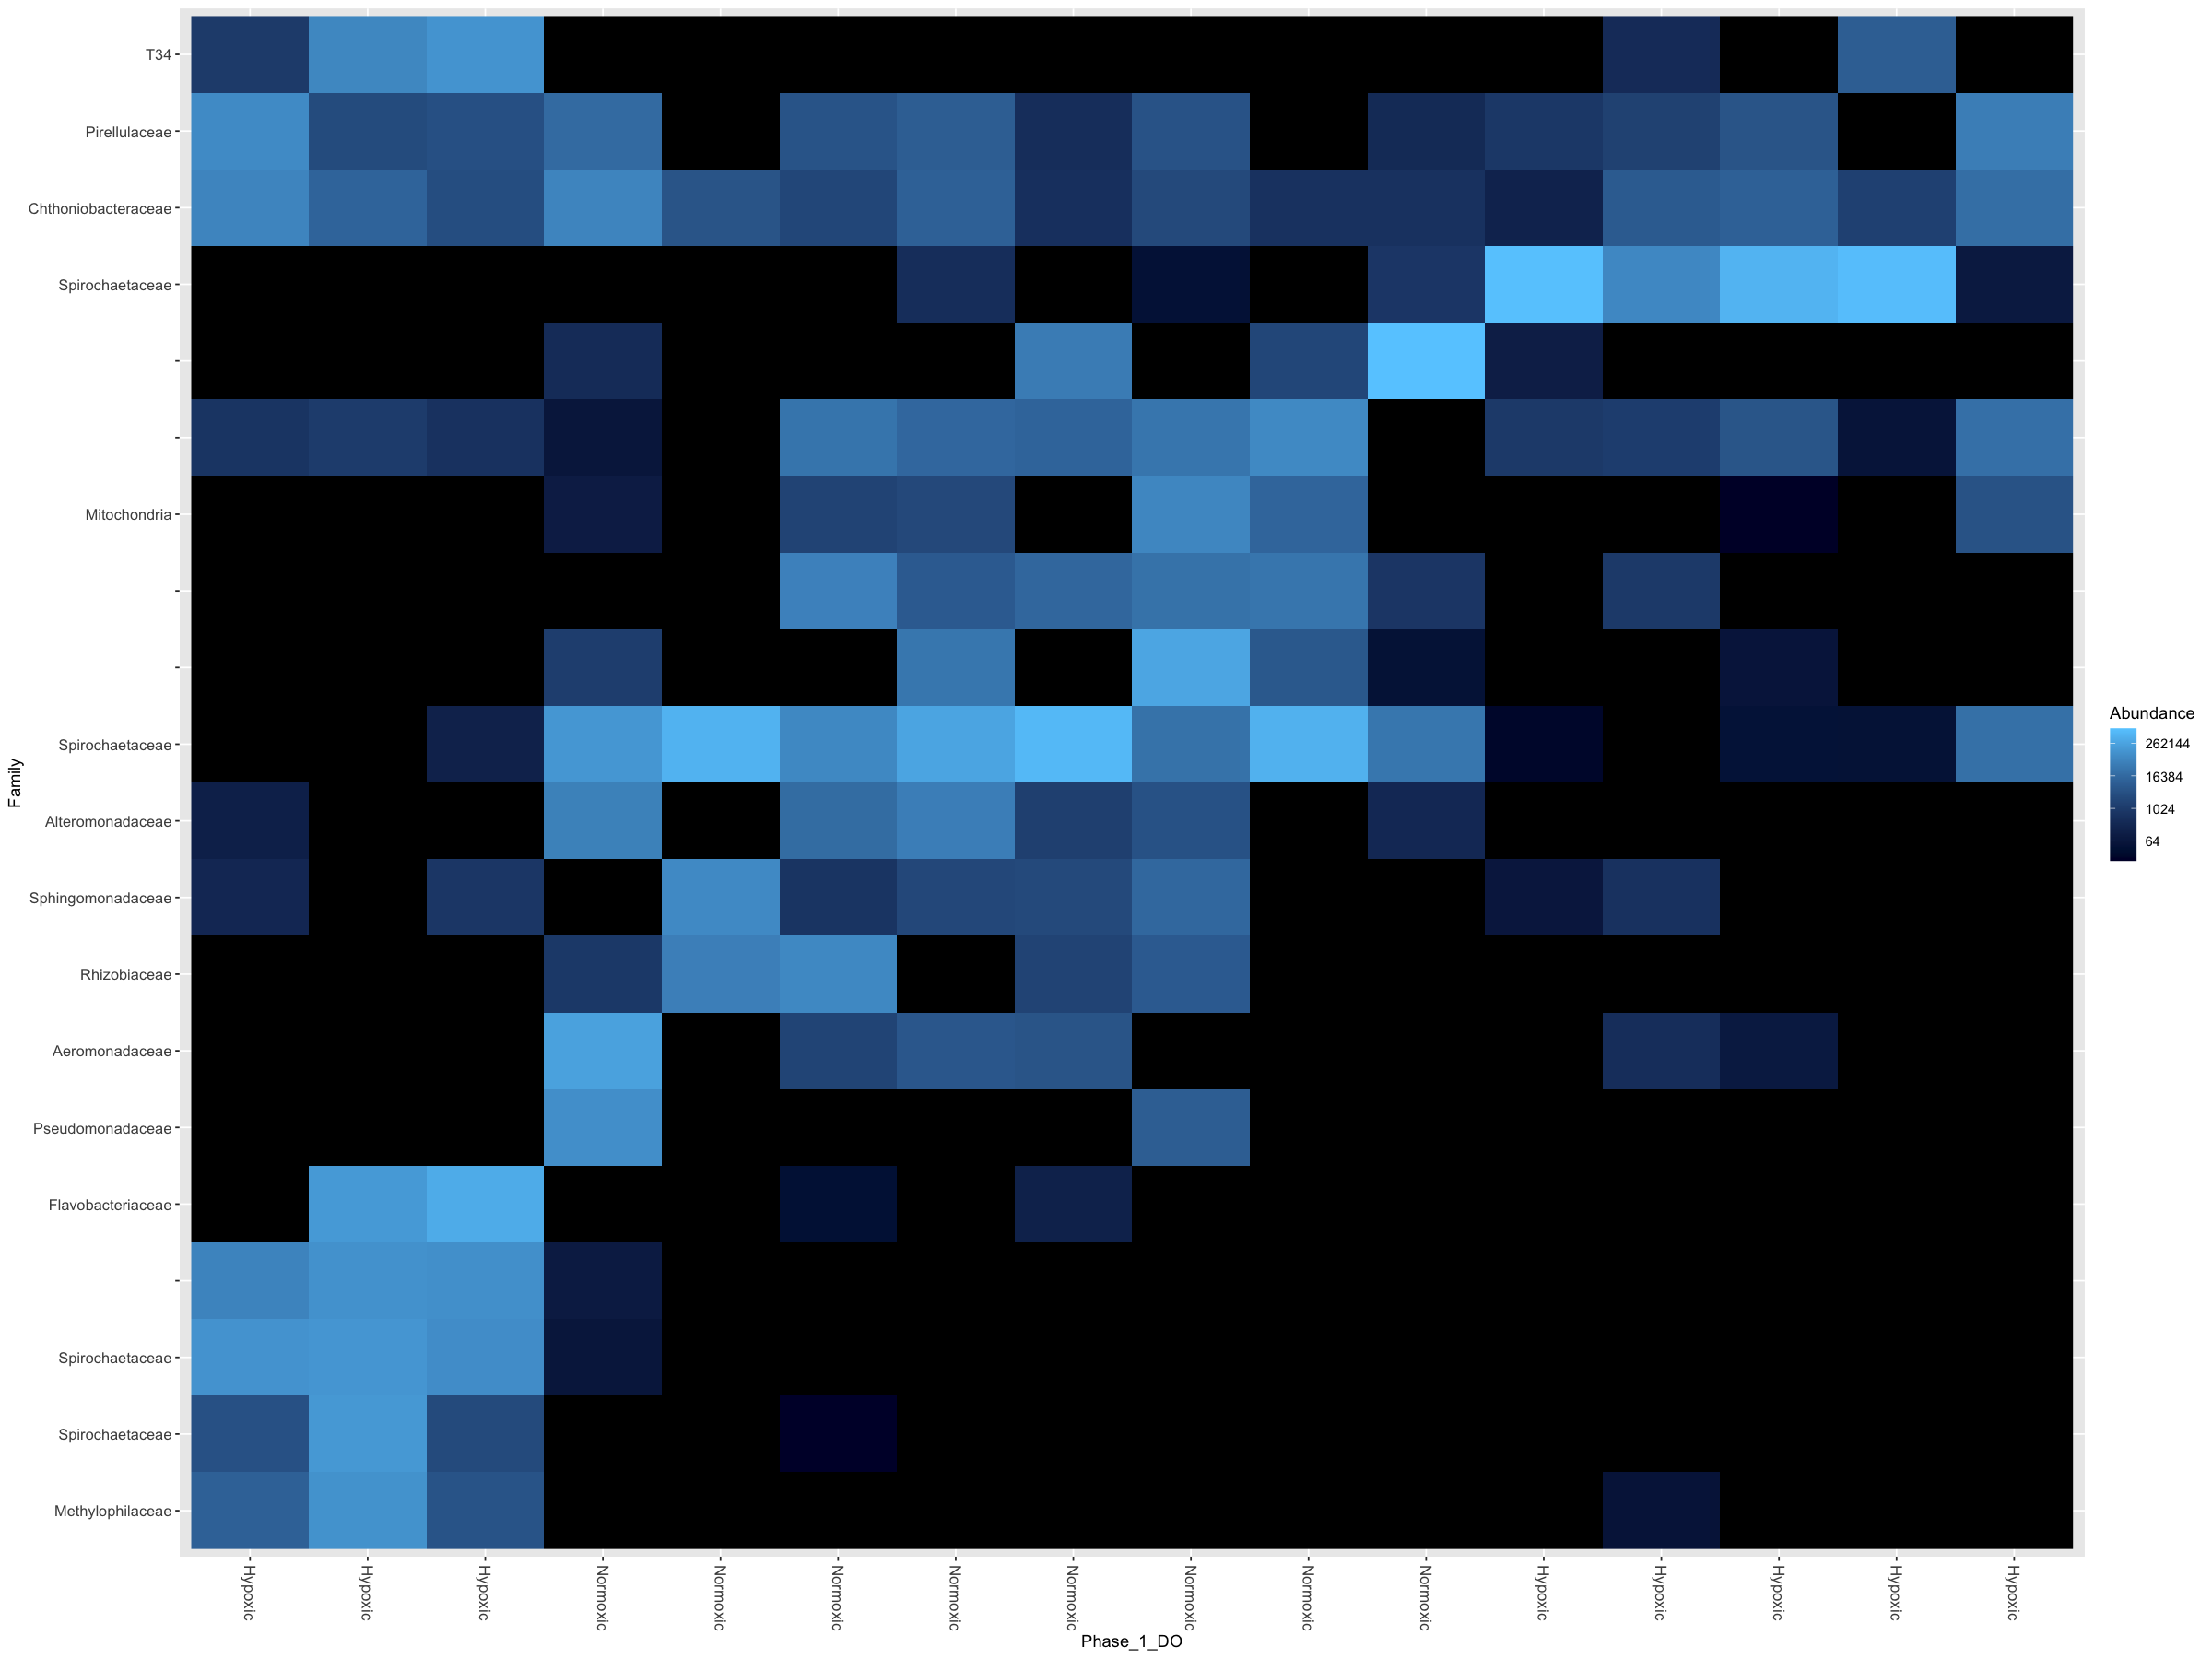

In [37]:
CE_bac20 = subset_taxa(CE, Kingdom=="Bacteria")
CE_bac20 = prune_taxa(names(sort(taxa_sums(CE_bac20),TRUE)[1:20]), CE_bac20)
plot_heatmap(CE_bac20, "NMDS", "bray", "Phase_1_DO", "Family")

In [39]:
#top5 phyla?
phylum.sum = tapply(taxa_sums(physeq), tax_table(physeq)[, "Phylum"], sum, na.rm=TRUE)
top5phyla = names(sort(phylum.sum, TRUE))[1:5]
physeq2 = prune_taxa((tax_table(physeq)[, "Phylum"] %in% top5phyla), physeq)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'object' in selecting a method for function 'tax_table': object 'physeq' not found


In [40]:
plot_heatmap(CE_bac100, "NMDS", "bray", "Phase_1_DO", "Order")

ERROR: Error in ordinate(physeq, method, distance, ...): object 'CE_bac100' not found


In [41]:
plot_bar(CE_bac100, "Phase_1_DO", fill = "Family")

ERROR: Error in psmelt(physeq): object 'CE_bac100' not found


In [43]:
mycolors= c('#1B9E77','#847B36','#CD6015','#966A77','#CD3893','#8E60A9','#BC5266','#74982A','#9EA811','#E6AB02')

In [42]:
CE_100 = prune_taxa(names(sort(taxa_sums(CE),TRUE)[1:100]), CE)


In [44]:
require(RColorBrewer)


Loading required package: RColorBrewer



In [45]:
mycolors= colorRampPalette(brewer.pal(8, "Dark2"))(20)


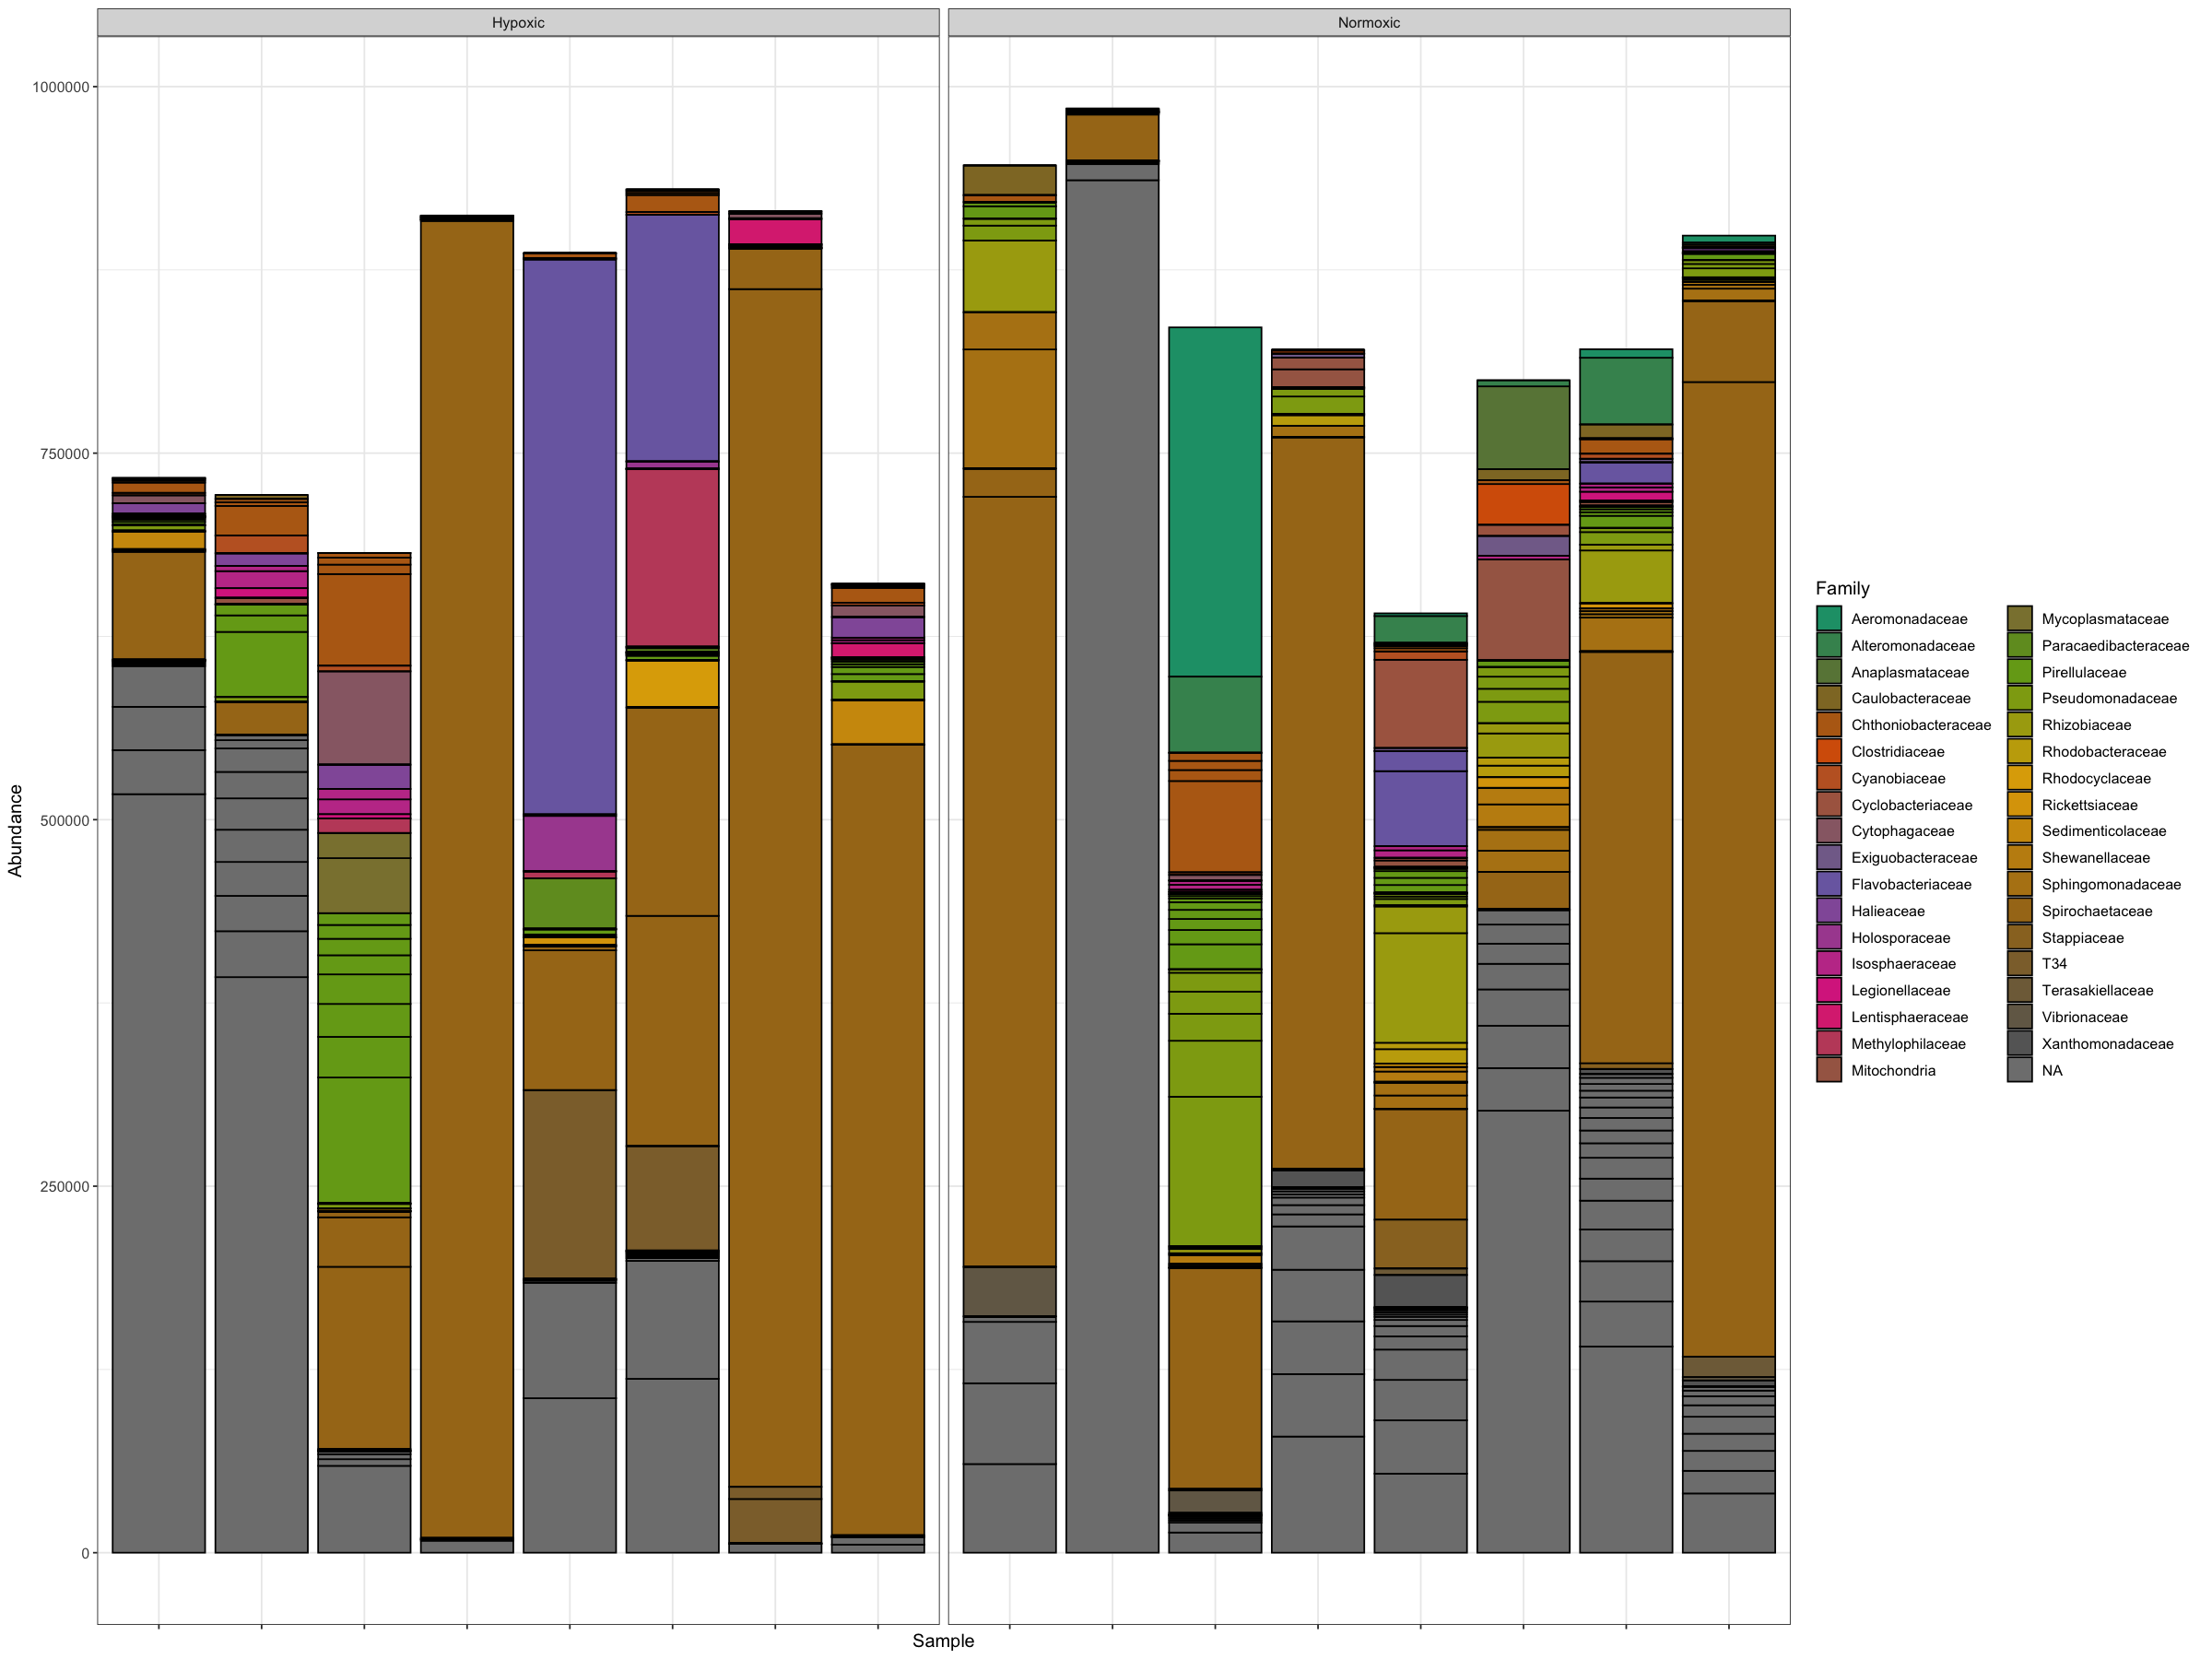

In [46]:
plot_bar(CE_100, fill="Family")+
scale_fill_manual(values=mycolors)+
theme_bw()+
facet_grid(.~Phase_1_DO, scales="free_x")+
theme(legend.position = "right", text = element_text(size=12), axis.text.x = element_blank())


In [47]:
ggsave(width=10, height=8, file="~/Documents/DE/DE_16S/CEtop100.pdf")

In [48]:
CE_Spiro = subset_taxa(CE, Phylum=="Spirochaetota")
CE_Spirof = filter_taxa(CE_Spiro, function(x) mean(x) > 500, TRUE)

In [49]:
(CE_Spirof)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9 taxa and 16 samples ]
sample_data() Sample Data:       [ 16 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 9 taxa by 6 taxonomic ranks ]

In [57]:
mycolors= colorRampPalette(brewer.pal(8, "Dark2"))(10)


In [62]:
options(repr.plot.width=10, repr.plot.height=12)

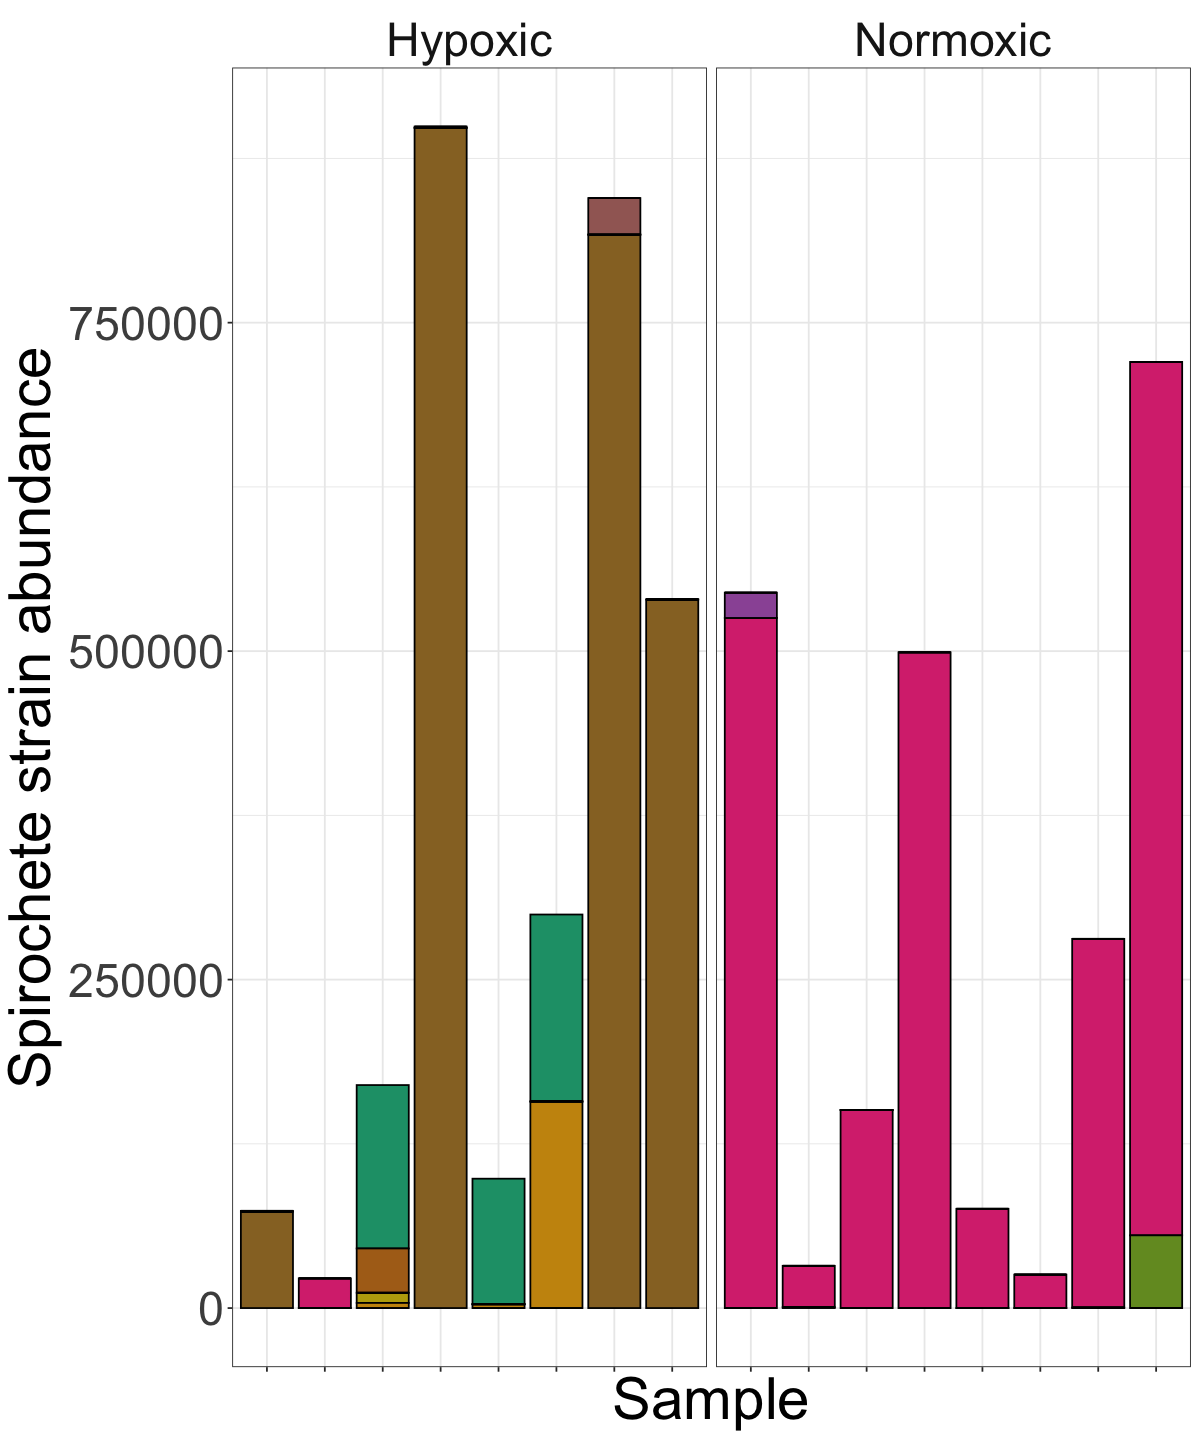

In [73]:

plot_bar(CE_Spirof, fill="OTU")+
scale_fill_manual(values=mycolors)+
theme_bw()+
facet_grid(.~Phase_1_DO, scales="free_x")+
 ylab("Spirochete strain abundance")+
theme(legend.position = "none",  text = element_text(size=35), axis.text.x = element_blank(), strip.background = element_blank())


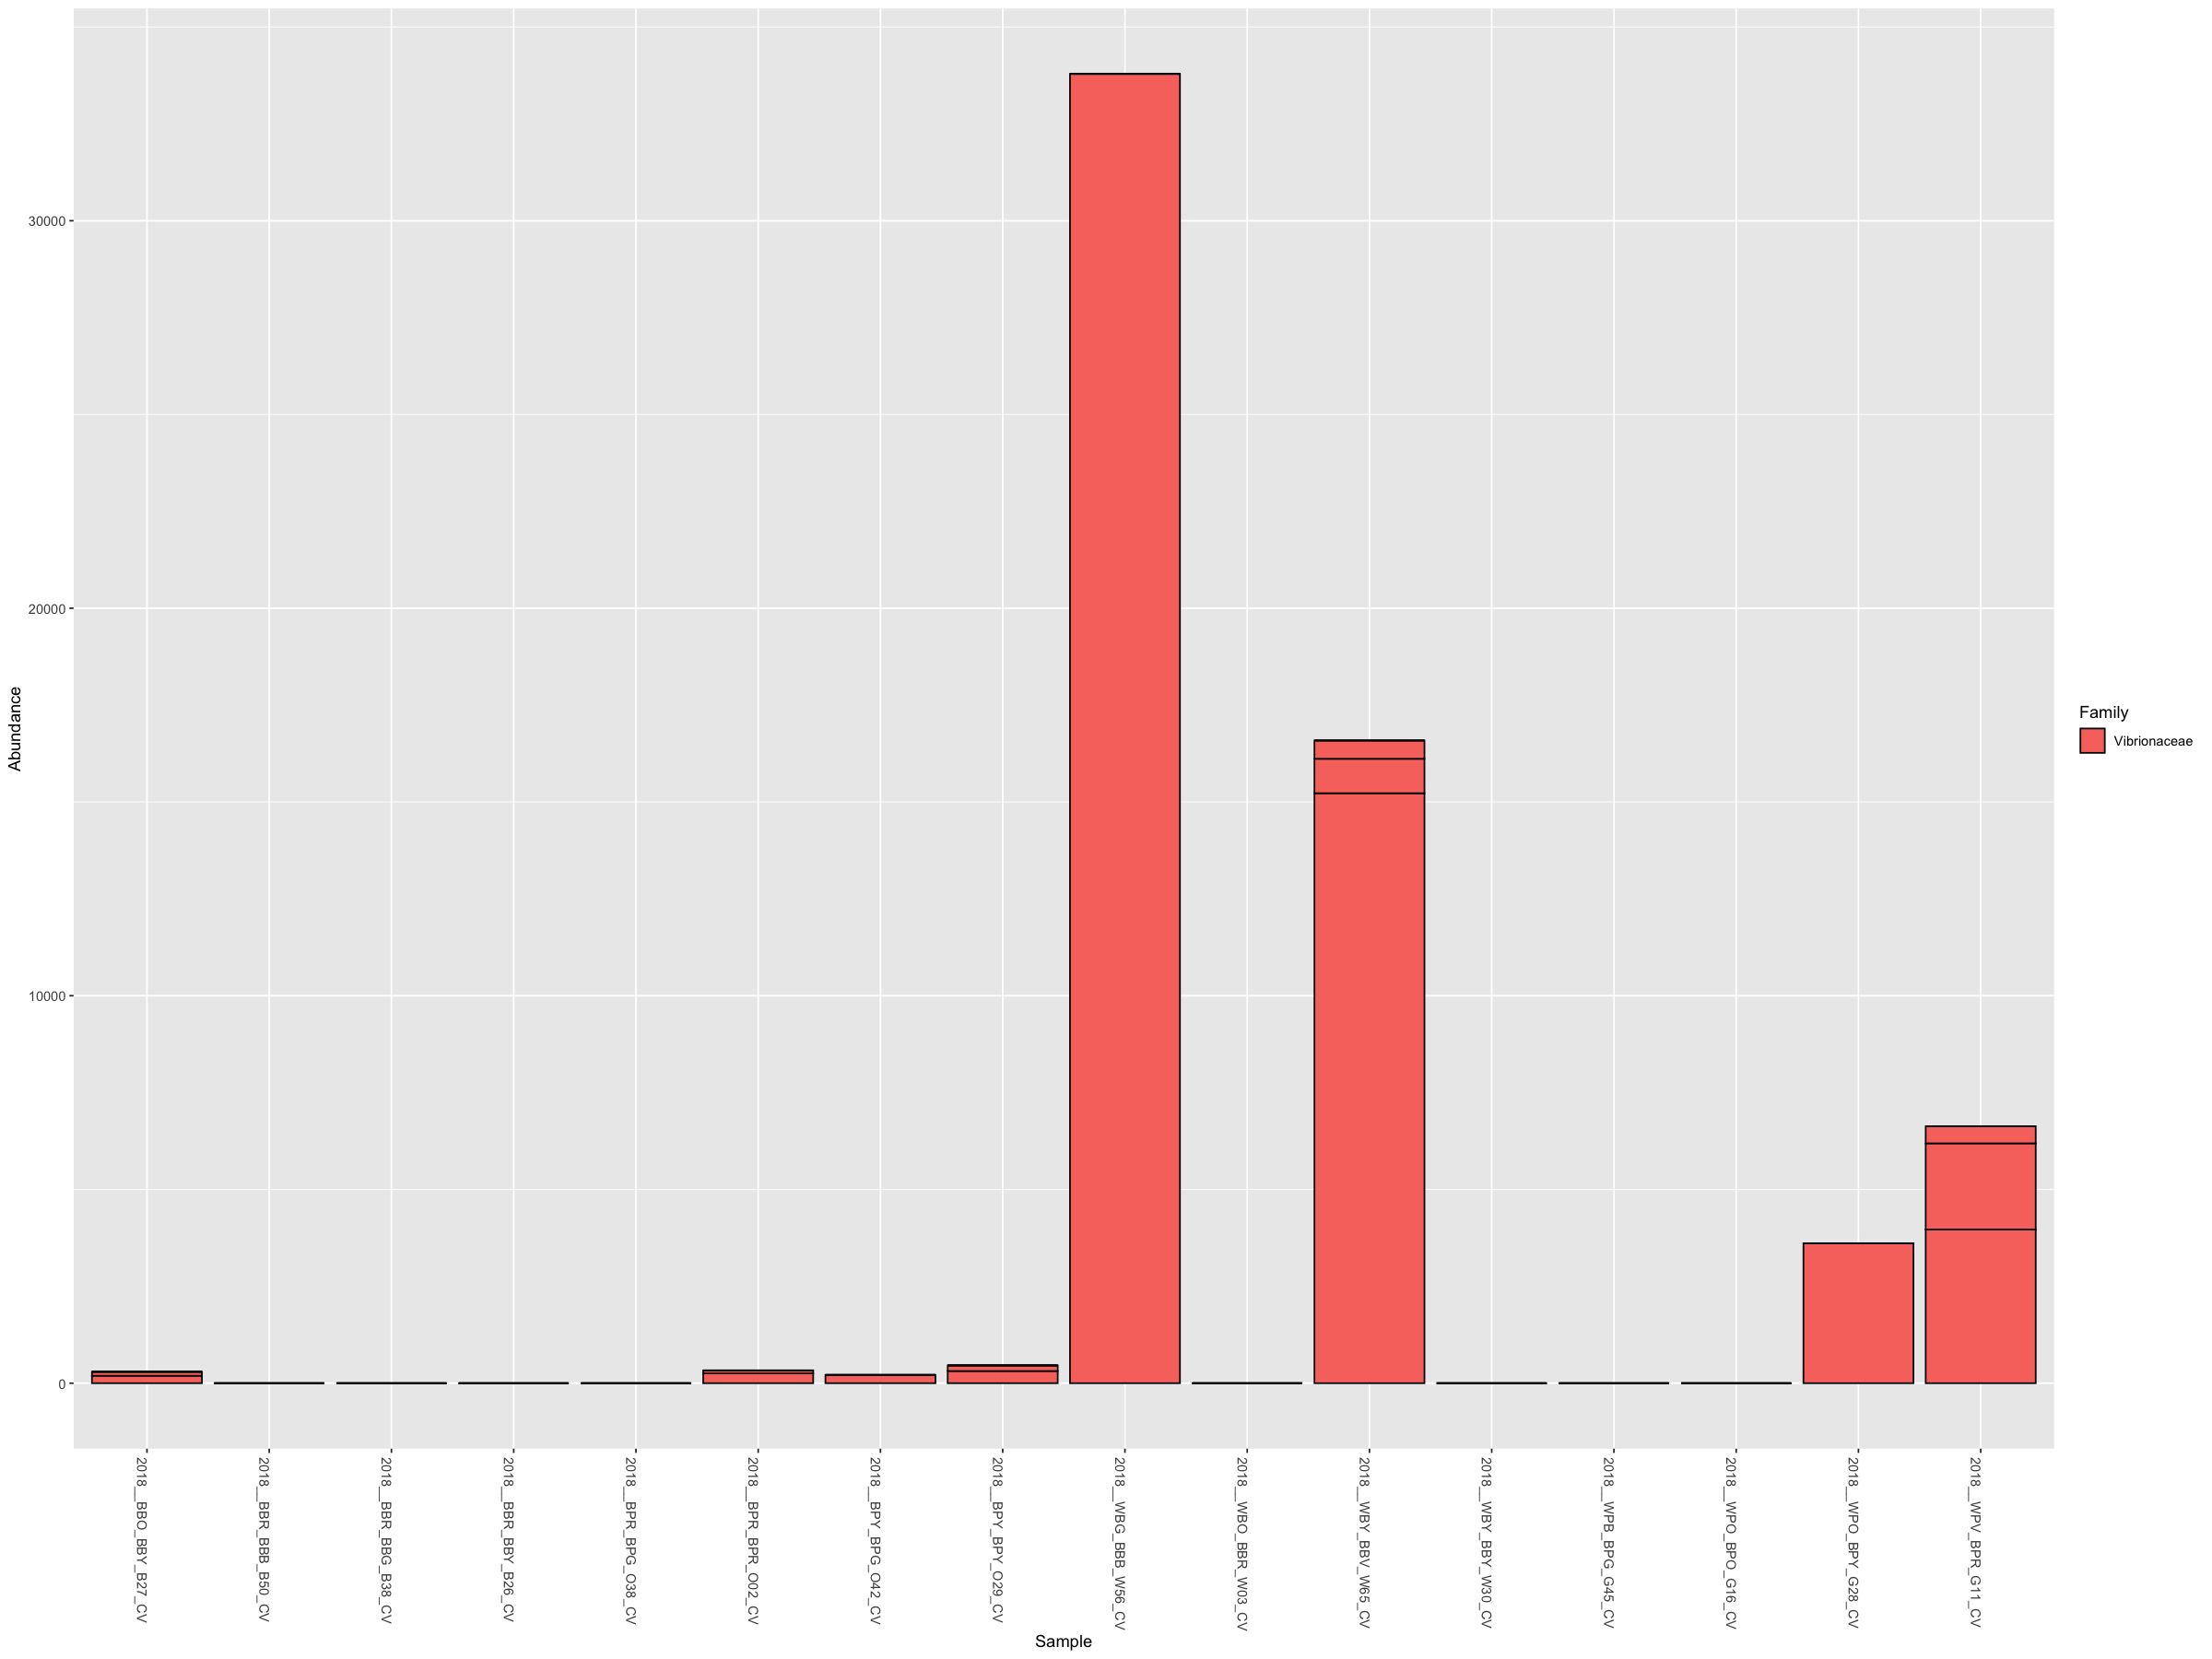

In [51]:
CE_Vibrio = subset_taxa(CE, Order=="Vibrionales")
plot_bar(CE_Vibrio, fill="Family")

In [52]:
TAX

Kingdom  
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG                                                                                                                                                                          Bacteria 
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG                                                                                                                                                                            Bacteria 
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCGGTTAAGTAAGTTAATGATAAAAGACCGTGGCTCAACCACGGAAATGTTGTTAATACTGCTTGACTAGAATTTTTGATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAATTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG                                                                                                                                                                          Bacteria 
TACGGAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCGCGTAGGCGGCTGTCCAAGTCAGGGGTGAAAGCCCGCGGCTCAACCGCGGAACTGCCCTTGAAACTGGACGGCTTGAACACGGGAGAGGTGAGTGGAATTCCGAGTGTAGAGGTGAAATTCGTAGATATTCGGAAGAACACCAGTGGCGAAGGCGACTCACTGGACCGTAGTTGACGCTGAGGCGCGAAAGCGTGGGGAGCGAACAGG                                                                                                                                                                            Bacteria 
TTCCAGCTCCAATAGCGTATATTAAAGTTGCTGCAGTTAAAAAGCTCGTAGCTGGATCTCGGGTCCAGGCTGGCGGTCCACCTCGTTGTGGTTACTGCCTGTTCTGACCCAACCTCTCGGTTGTAAACCCTTGGTGCTCTTGATTGAGTTGCTTCGGGTGGCCGAAACTTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCGATTCGCCTGCACAATGGTGCATGGAATAATGGAATAGGACCTCGGTTCTATTTTGTTGGTTTTCGGAACACGAGGTAATGATTAAGAGGGACTGACGGGGGCATTCGTATGGCGGGGTTAGAGGTGAAATTCTTGGATCCTCGCCAGACGGCCTACAGCGAAAGCATTTGCCAAGCATGTTTTCATTAGTCAAGAACGAAAGTCAGAGGTTCGAAGACG Eukaryota
GACGGAGGATGCAAGTGTTATCCGGAATCACTGGGCGTAAAGCGTCTGTAGGTGGTTTAATAAGTCAACTGTTAAATCTTGAGGCTCAACTTCAAAATCGCAGTCGAAACTATTAGACTAGAGTATAGTAGAGGTAAAGGGAATTTCCAGTGGAGCGGTGAAATGCGTAGATATTGGAAAGAACACCGATGGCGAAAGCACTTTACTGGGCTATTACTAACACTCAGAGACGAAAGCTAGGGTAGCAAATGGG                                                                                                                                                                            Bacteria 
TACGGAGGGTGCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTACGTAGGTGGTTTGGTAAGTCAGAGGTGAAATACGGTAGCTTAACTATCGAATTGCCTTTGATACTATTAAACTTGAGTTCTATTGAGGTAGACGGAATTGATAGTGTAGCGGTGAAATGCATAGATACTATCAGGAACACCAATTGCGAAGGCAGTTTACTAAATAGACACTGACACTAAAGTACGAAGGCGTGGGTAGCAAACAGG                                                                                                                                                                            Bacteria 
TACGGAGGATGCAAGTGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGTGGTCTGGTAAGTCAGAGGTGAAAGACGGTGGCTCAACCATCGCAGTGCCCTTGATACTATTGGACTAGATTACATTGGAAGTAGGCGGAATGTGCGGTGTAGCGGTGAAATGCGCAGATATCGCACGGAACACCAATAGCGAAAGCAGCTTACTATACTGTTAATGACACTGAGGCACGAAAGCGTGGGTAGCAAATAGG                                                                                                                                                                            Bacteria 
TACGGGAGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTCCGCAGGCGGTCTTGTAAGTCTGTTGTTAAAGCGTGGAGCTTAACTCCATTTCAGCAATGGAAACTGTAAGACTAGAGTGTGGTAGGGGCAGAGGGAATTCCCGGTGTAGCGGTGAAATGCGTAGATATCGGGAAGAACACCAGTGGCGAAGGCGCTCTGCTGGGCCATAACTGACGCTCATGGACGAAAGCCAGGGGAGCGAAAGGG                                                                                                                                                                            Bacteria 
TACGGAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCGCGTAGGCGGATTATTAAGTCAGAGGTGAA

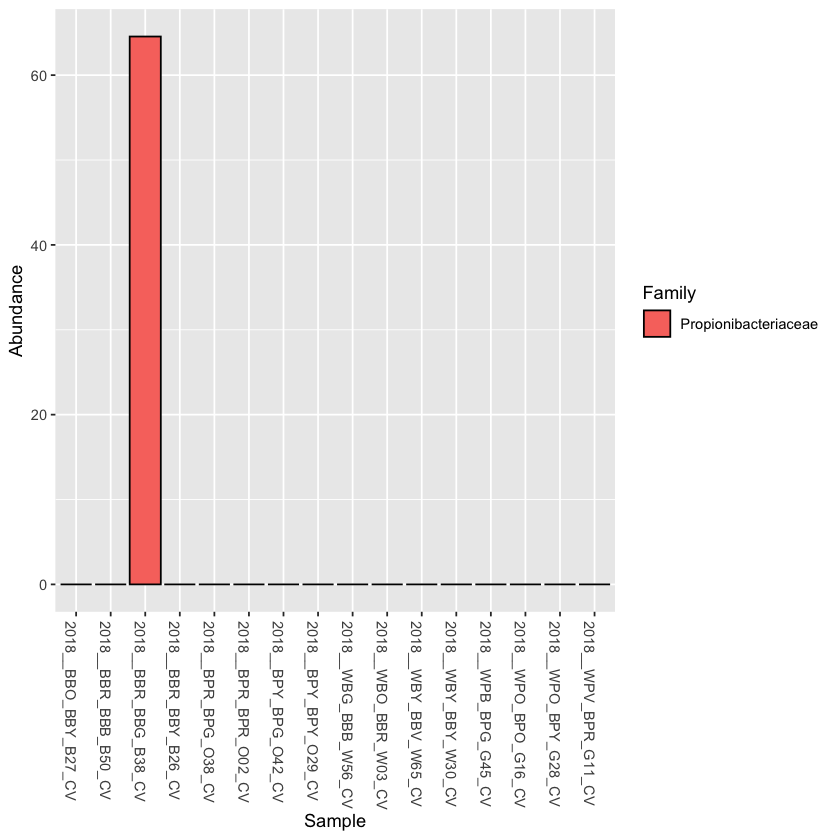

In [379]:
CE_Pro = subset_taxa(CE, Family=="Propionibacteriaceae")
plot_bar(CE_Pro, fill="Family")

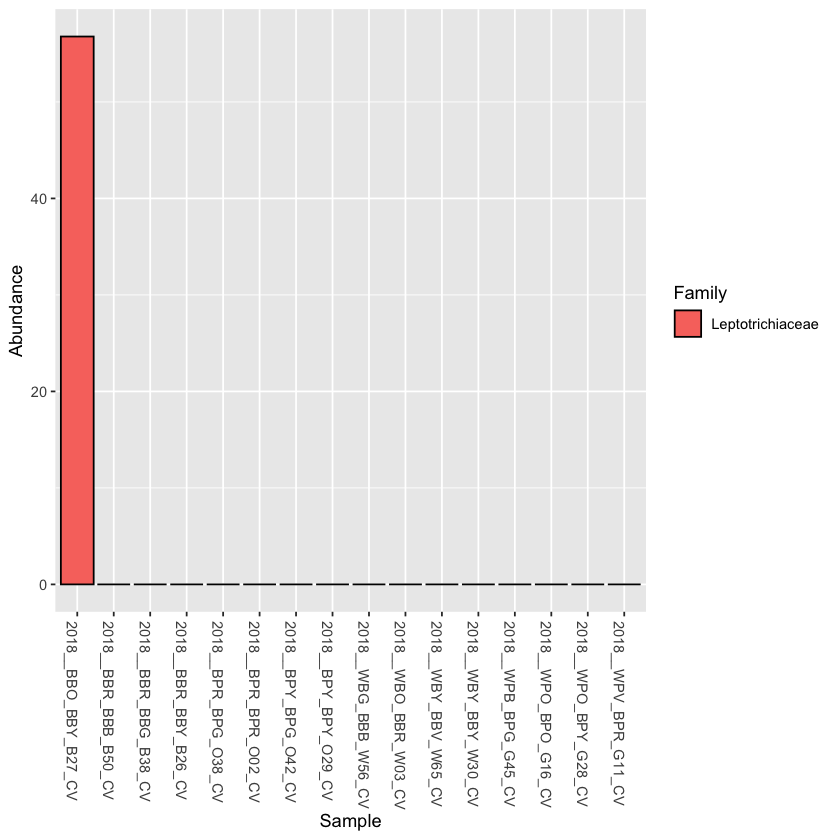

In [371]:
CE_Fuso = subset_taxa(CE, Order=="Fusobacteriales")
plot_bar(CE_Fuso, fill="Family")

In [ ]:
BPBP=hypoxic warm, hypoxic warm
BBBB=hypoxic ambient, hypoxic ambient

WBBB=normoxic ambient, hypoxic ambient
WPBP=normoxic warm, hypoxic warm
